# Trabalho eleições

O objetivo desse trabalho é entender as variáveis que influenciam o resultado da eleição estadual de 2018. Para isso, pegamos a base de dados oficial do TSE, pegamos (apenas) o resultado para São Paulo e filtramos para apenas os candidatos que atingiram uma votação igual a pelo menos 10% da quota eleitoral.

#### Vamos segmentar o trabalho em partes
Parte 1: preparação dos dados<br>
Parte 2: ajustando parâmetros do modelo <br>
Parte 3: escolhendo modelo <br>
Parte 4: rodando modelo <br>
Parte 5: analisando resultados

-----------------------------

## Parte 1: preparação dos dados

O objetivo para essa parte de limpeza de dados é chegarmos em um DataFrame onde as linhas sejam os municípios e as colunas, os candidatos. Dessa forma, na intersecção apareceria a soma dos votos de cada candidato para cada município. A base de dados "Tudo Acentuado Finalmente" é resultado de um trabalho extenso de corrigir os acentos ortográficos da base de dados original do TSE.

OBS: Há um outro notebook que mostra todo o processo de seleção de dados e correção dos acentos. Eu dividi em dois notebooks para evitar deixar o notebook muito extenso. O leitor interessado pode ver o outro notebook no mesmo repositório.

In [1]:
#importando as bibliotecas

import numpy as np
import pandas as pd

In [2]:
# importando o dataframe
df = pd.read_csv(".\\Bases de dado intermediárias\\Tudo Acentuado Finalmente.csv")

In [3]:
df.shape

(87075, 54)

O DataFrame tem 87075 linhas porque a eleição em São Paulo consistiu em 135 candidatos e 645 municípios. Como o dado vem segmentado, temos um total de 645*135 = 87075 linhas, um para cada candidato em cada município

In [4]:
df.NM_CANDIDATO.value_counts()

ANDREA WERNER SILVA BONOLI           645
VANDERLEI MACRIS                     645
LUIZ PHILIPPE DE ORLEANS BRAGANÇA    645
KAYO FELYPE NACHTAJLER AMADO         645
RICARDO IZAR JUNIOR                  645
                                    ... 
ALEXANDRE FROTA DE ANDRADE           645
IVAN VALENTE                         645
VITOR LIPPI                          645
FRANCISCO EVERARDO OLIVEIRA SILVA    645
CARLOS EDUARDO GABAS                 645
Name: NM_CANDIDATO, Length: 135, dtype: int64

Todos os candidatos foram votados nos 645 municípios de São Paulo

In [5]:
df.NM_MUNICIPIO.value_counts()

LIMEIRA           135
PRAIA GRANDE      135
LINS              135
RIBEIRÃO PRETO    135
JOÃO RAMALHO      135
                 ... 
PONTAL            135
PEDRA BELA        135
LUTÉCIA           135
TARUMÃ            135
SUD MENNUCCI      135
Name: NM_MUNICIPIO, Length: 645, dtype: int64

Todos os municipios votaram em 135 candidatos.

In [17]:
# fazendo uma sub dataframe
df = df[['NM_MUNICIPIO', 'NM_CANDIDATO', 'votoscandmun']]

In [18]:
# agrupando
df = df.groupby(['NM_MUNICIPIO','NM_CANDIDATO']).sum()

In [19]:
# vejamos como ficou
df

votoscandmun
NM_MUNICIPIO NM_CANDIDATO                             
ADAMANTINA   ADILSON BARROSO OLIVEIRA               16
             ADRIANA MIGUEL VENTURA                 33
             ADRIANO ELI CORRÊA                      2
             ADÉRMIS MARINI JUNIOR                   5
             AILTON JOSÉ DE LIMA                     0
...                                                ...
ÓLEO         VICENTE PAULO DA SILVA                  0
             VINICIUS LAZZER POIT                    3
             VINICIUS RAPOZO DE CARVALHO             4
             VITOR LIPPI                             0
             WALTER SHINDI IIHOSHI                  42

[87075 rows x 1 columns]

In [20]:
# desagrupando
df = df.unstack()

In [21]:
# verificando se os candidatos estão nas linhas
df.index

Index(['ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'AGUDOS', 'ALAMBARI',
       'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS', 'ALTO ALEGRE', 'ALUMÍNIO',
       ...
       'VÁRZEA PAULISTA', 'ZACARIAS', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA',
       'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'ÁLVARES FLORENCE',
       'ÁLVARES MACHADO', 'ÁLVARO DE CARVALHO', 'ÓLEO'],
      dtype='object', name='NM_MUNICIPIO', length=645)

In [22]:
# visualizando
df.head()

votoscandmun                         \
NM_CANDIDATO ADILSON BARROSO OLIVEIRA ADRIANA MIGUEL VENTURA   
NM_MUNICIPIO                                                   
ADAMANTINA                         16                     33   
ADOLFO                              5                      2   
AGUAÍ                             138                     22   
AGUDOS                            197                      8   
ALAMBARI                            2                      0   

                                                                           \
NM_CANDIDATO ADRIANO ELI CORRÊA ADÉRMIS MARINI JUNIOR AILTON JOSÉ DE LIMA   
NM_MUNICIPIO                                                                
ADAMANTINA                    2                     5                   0   
ADOLFO                        0                     0                   0   
AGUAÍ                         4                     3                  62   
AGUDOS                        2                     1                   1   
ALAMBARI                      3                     0                   0   

                                                          \
NM_CANDIDATO ALENCAR SANTANA BRAGA ALEX SPINELLI MANENTE   
NM_MUNICIPIO                                               
ADAMANTINA                       0                    41   
ADOLFO                           0                     1   
AGUAÍ                            3                     3   
AGUDOS                           6                     2   
ALAMBARI                         0                     3   

                                                                  \
NM_CANDIDATO ALEXANDRE FROTA DE ANDRADE ALEXANDRE LEITE DA SILVA   
NM_MUNICIPIO                                                       
ADAMANTINA                           76                        4   
ADOLFO                                9                        0   
AGUAÍ                                85                      271   
AGUDOS                               82                      701   
ALAMBARI                             17                        3   

                                             ...  \
NM_CANDIDATO ALEXANDRE ROCHA SANTOS PADILHA  ...   
NM_MUNICIPIO                                 ...   
ADAMANTINA                               95  ...   
ADOLFO                                    1  ...   
AGUAÍ                                    11  ...   
AGUDOS                                   14  ...   
ALAMBARI                                  1  ...   

                                                                            \
NM_CANDIDATO TABATA CLAUDIA AMARAL DE PONTES TELMA SANDRA AUGUSTO DE SOUZA   
NM_MUNICIPIO                                                                 
ADAMANTINA                               134                             0   
ADOLFO                                     4                             0   
AGUAÍ                                     76                             0   
AGUDOS                                    75                             0   
ALAMBARI                                   7                             0   

                                                                 \
NM_CANDIDATO VALDOMIRO LOPES DA SILVA JUNIOR VALMIR PRASCIDELLI   
NM_MUNICIPIO                                                      
ADAMANTINA                                 7                 61   
ADOLFO                                    63                  0   
AGUAÍ                                      5                  6   
AGUDOS                                     9                  1   
ALAMBARI                                   0                  0   

                                                                           \
NM_CANDIDATO VANDERLEI MACRIS VICENTE PAULO DA SILVA VINICIUS LAZZER POIT   
NM_MUNICIPIO                                                                
ADAMANTINA                103                      7       

In [112]:
# tudo certo, vamos salvar a base final para uso no futuro
df.to_csv('H:\\OneDrive\\FGV\\6 semestre\\GVCODE Projetos\\LDA\\O tal do\\Eleições.csv')

### Agora que a base está pronta, vamos fazer uma análise exploratória. Vejamos quem são os top 10 candidatos que mais receberam votos.

In [2]:
# importando a base
df = pd.read_csv('Eleicoes.csv', header = 1, index_col=0)
df.drop(['NM_MUNICIPIO'], inplace=True)

In [5]:
# criando linha de total
df.loc['Total',:] = df.sum(axis=0)
df

,ADILSON BARROSO OLIVEIRA,ADRIANA MIGUEL VENTURA,ADRIANO ELI CORRÊA,ADÉRMIS MARINI JUNIOR,AILTON JOSÉ DE LIMA,ALENCAR SANTANA BRAGA,ALEX SPINELLI MANENTE,ALEXANDRE FROTA DE ANDRADE,ALEXANDRE LEITE DA SILVA,ALEXANDRE ROCHA SANTOS PADILHA,...,TABATA CLAUDIA AMARAL DE PONTES,TELMA SANDRA AUGUSTO DE SOUZA,VALDOMIRO LOPES DA SILVA JUNIOR,VALMIR PRASCIDELLI,VANDERLEI MACRIS,VICENTE PAULO DA SILVA,VINICIUS LAZZER POIT,VINICIUS RAPOZO DE CARVALHO,VITOR LIPPI,WALTER SHINDI IIHOSHI
NM_CANDIDATO,,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,16.0,33.0,2.0,5.0,0.0,0.0,41.0,76.0,4.0,95.0,...,134.0,0.0,7.0,61.0,103.0,7.0,103.0,2.0,2.0,75.0
ADOLFO,5.0,2.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1.0,...,4.0,0.0,63.0,0.0,1.0,3.0,8.0,0.0,0.0,1.0
AGUAÍ,138.0,22.0,4.0,3.0,62.0,3.0,3.0,85.0,271.0,11.0,...,76.0,0.0,5.0,6.0,16.0,8.0,46.0,0.0,1.0,3.0
AGUDOS,197.0,8.0,2.0,1.0,1.0,6.0,2.0,82.0,701.0,14.0,...,75.0,0.0,9.0,1.0,1.0,203.0,80.0,690.0,24.0,6.0
ALAMBARI,2.0,0.0,3.0,0.0,0.0,0.0,3.0,17.0,3.0,1.0,...,7.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÁLVARES FLORENCE,3.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0,3.0,18.0,...,16.0,0.0,65.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0
ÁLVARES MACHADO,8.0,2.0,1.0,1.0,0.0,1.0,6.0,33.0,44.0,52.0,...,50.0,2.0,0.0,0.0,0.0,296.0,28.0,0.0,5.0,6.0
ÁLVARO DE CARVALHO,8.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,...,3.0,0.0,5.0,0.0,2.0,1.0,0.0,13.0,0.0,50.0


In [65]:
top10_names = df.loc['Total',:].sort_values(ascending=False).index[0:10]
top10_votes = df.loc['Total',:].sort_values(ascending=False).values[0:10]

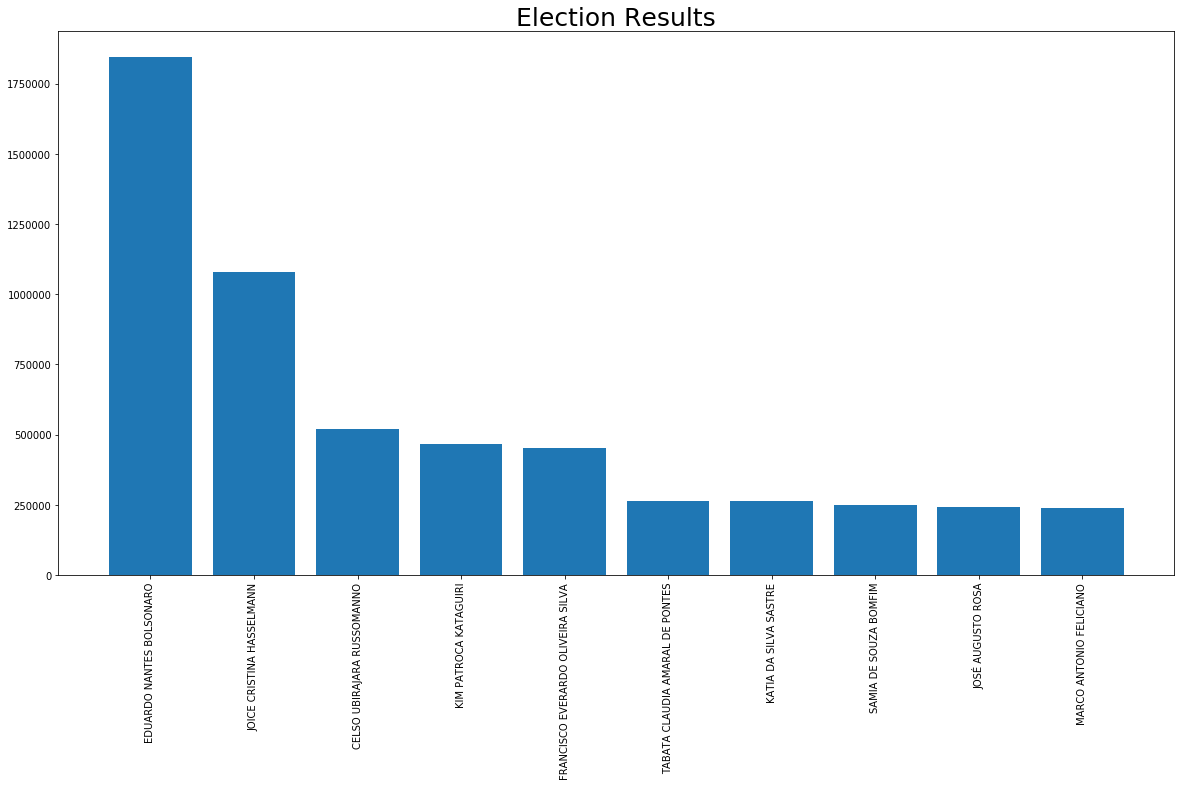

In [72]:
plt.figure(figsize=(20,10))
plt.bar(top10_names,top10_votes)
plt.xticks(fontsize=10,rotation=90)
plt.title('Election Results',size=25)
plt.show()

In [ ]:
for i in range(len(df.T.columns)):
    plt.figure(figsize=(10,5))
    plt.bar([i for i in df.columns],df.iloc[i,:])
    plt.xticks(fontsize=4,rotation=90)
    plt.title(df.T.columns[i])
    plt.show()

---

## Parte 2: ajustando parâmetros do modelo

In [2]:
# importando bibliotecas

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
# importando a base
df = pd.read_csv('Eleicoes.csv', header = 1, index_col=0)
df.drop(['NM_MUNICIPIO'], inplace=True)
df

,ADILSON BARROSO OLIVEIRA,ADRIANA MIGUEL VENTURA,ADRIANO ELI CORRÊA,ADÉRMIS MARINI JUNIOR,AILTON JOSÉ DE LIMA,ALENCAR SANTANA BRAGA,ALEX SPINELLI MANENTE,ALEXANDRE FROTA DE ANDRADE,ALEXANDRE LEITE DA SILVA,ALEXANDRE ROCHA SANTOS PADILHA,...,TABATA CLAUDIA AMARAL DE PONTES,TELMA SANDRA AUGUSTO DE SOUZA,VALDOMIRO LOPES DA SILVA JUNIOR,VALMIR PRASCIDELLI,VANDERLEI MACRIS,VICENTE PAULO DA SILVA,VINICIUS LAZZER POIT,VINICIUS RAPOZO DE CARVALHO,VITOR LIPPI,WALTER SHINDI IIHOSHI
NM_CANDIDATO,,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,16.0,33.0,2.0,5.0,0.0,0.0,41.0,76.0,4.0,95.0,...,134.0,0.0,7.0,61.0,103.0,7.0,103.0,2.0,2.0,75.0
ADOLFO,5.0,2.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1.0,...,4.0,0.0,63.0,0.0,1.0,3.0,8.0,0.0,0.0,1.0
AGUAÍ,138.0,22.0,4.0,3.0,62.0,3.0,3.0,85.0,271.0,11.0,...,76.0,0.0,5.0,6.0,16.0,8.0,46.0,0.0,1.0,3.0
AGUDOS,197.0,8.0,2.0,1.0,1.0,6.0,2.0,82.0,701.0,14.0,...,75.0,0.0,9.0,1.0,1.0,203.0,80.0,690.0,24.0,6.0
ALAMBARI,2.0,0.0,3.0,0.0,0.0,0.0,3.0,17.0,3.0,1.0,...,7.0,0.0,0.0,0.0,9.0,0.0,8.0,0.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÁGUAS DE SÃO PEDRO,6.0,10.0,6.0,1.0,1.0,7.0,3.0,22.0,0.0,12.0,...,49.0,0.0,0.0,0.0,7.0,107.0,20.0,0.0,1.0,0.0
ÁLVARES FLORENCE,3.0,1.0,0.0,0.0,0.0,0.0,3.0,14.0,3.0,18.0,...,16.0,0.0,65.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0
ÁLVARES MACHADO,8.0,2.0,1.0,1.0,0.0,1.0,6.0,33.0,44.0,52.0,...,50.0,2.0,0.0,0.0,0.0,296.0,28.0,0.0,5.0,6.0


### Qual é o nosso objetivo?

O objetivo é chegar nos vetores de preferências dos candidatos. O paper assume que os municípios e candidatos podem ser divididos em vetores de preferências.

O LDA vai fatorar a matriz de input e retornar os vetores de preferência de acordo com os hiperparâmetros alpha, beta e k. 

In [4]:
# importando o modelo
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split

In [5]:
# calculando maxk (para k > maxk, o problema não tem solução)

m = df.shape[1]  # m = candidatos
n = df.shape[0]  # n = municípios
maxk = (m*n)//(m+n)  # função floor para arredondar para baixo
print(f"Total de {m} candidatos, {n} municípios.\nAssim sendo, maxk = {maxk}")

Total de 135 candidatos, 645 municípios.
Assim sendo, maxk = 111


In [9]:
# Quantos modelos vamos rodar?

ptest = .10 # Proporção de municípios para amostra de teste
ntest = int(ptest*n) # Número de municípios na amostra de teste
alphas = [1e-5, 1e-3, 1e-1] # parâmetro da Dirichlet da distribuição de candidatos por componente
betas = [1e-5, 1e-3, 1e-1] # parâmetro da Dirichlet da distribuição de componentes por município
resample = 10

print(f"Total de {len(alphas)*len(betas)*resample*maxk} modelos a serem testados.")

Total de 9990 modelos a serem testados.


In [6]:
# Quantos modelos vamos rodar?

ptest = .10 # Proporção de municípios para amostra de teste
ntest = int(ptest*n) # Número de municípios na amostra de teste
alphas = [1e-5] # parâmetro da Dirichlet da distribuição de candidatos por componente
betas = [1e-5] # parâmetro da Dirichlet da distribuição de componentes por município
resample = 10


print(f"Total de {len(alphas)*len(betas)*resample*maxk} modelos a serem testados.")

Total de 1110 modelos a serem testados.


In [ ]:
# rodando os modelos

cores = -1  # para paralelizar; -1 = todos os cores

result = []  # criando lista de resultado


# loop que roda tudo
for beta in betas:
    for alpha in alphas:
        for k in range(2, maxk):

            perplexities = []  # cria lista vazia de perplexidades

            for sample in range(resample):

                # divide em treino e teste, roda o modelo e retorna perplexidade
                df_train, df_test = train_test_split(df, test_size=ntest)
                model = LDA(n_components=k, topic_word_prior=alpha,
                            doc_topic_prior=beta, n_jobs=cores)
                model.fit(df_train)
                perplexities.append(model.perplexity(df_test))

            # coloca tudo em uma lista e appenda em result
            my_result = [alpha, beta, k, np.mean(perplexities)]
            result.append(my_result)


# salvando para depois
with open('result.pkl', 'wb') as arq:
    pickle.dump(result, arq)

In [8]:
import requests

def telegram_bot_sendtext(bot_message):
    
    bot_token = '1235065480:AAEwGIsNChBNp3lR0JObvIerlg8vyTi2OGQ'
    bot_chatID = '1066883923'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response.json()

In [9]:
telegram_bot_sendtext("Oi Rapha! \nSeu modelo está pronto")

{'ok': True,
 'result': {'message_id': 14,
  'from': {'id': 1235065480,
   'is_bot': True,
   'first_name': 'Meu_Desktopzão',
   'username': 'Meu_PC_bot'},
  'chat': {'id': 1066883923,
   'first_name': 'Raphael',
   'last_name': 'Dayan',
   'type': 'private'},
  'date': 1593468736,
  'text': 'Oi Rapha! \nSeu modelo está pronto'}}

---

## Parte 3: escolhendo modelo

In [2]:
# importando bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# abrindo o arquivo
with open('result.pkl', 'rb') as arq:
    result = pickle.load(arq)

# transformando em DataFrame
dfres = pd.DataFrame(result,columns = ['alpha', 'beta', 'k', 'perplexity'])

#### Vamos agora plotar o resultado e analisar os gráficos

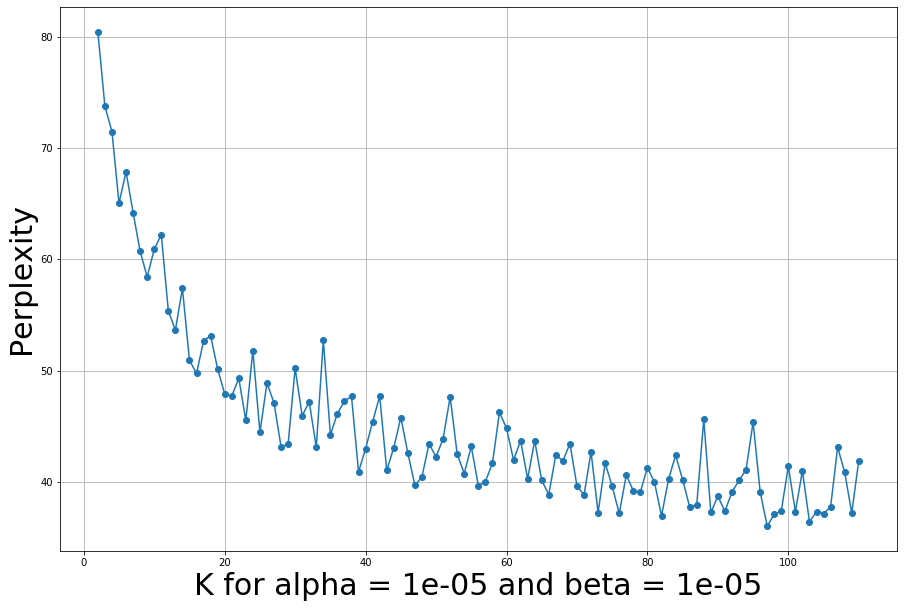

In [14]:
# plotando tudo

for alpha in alphas:
    for beta in betas:

        # definindo k e perplexity
        k = dfres[(dfres['alpha'] == alpha) & (
            dfres['beta'] == beta)].iloc[:,2]
        perplexity = dfres[(dfres['alpha'] == alpha) & (
            dfres['beta'] == beta)].iloc[:,3]

        plt.figure(figsize=(15,10))
        plt.plot(k, perplexity, "o-")
        plt.xlabel(f'K for alpha = {alpha} and beta = {beta}', size=30)
        plt.ylabel('Perplexity', size=30)
        plt.grid()
        plt.show()

In [ ]:
# gráfico perplexidade x alpha


------

## Parte 4: rodando modelo

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA


# importando a base
df = pd.read_csv('Eleicoes.csv', header=1, index_col=0)
df.drop(['NM_MUNICIPIO'], inplace=True)


# rodando o modelo
model = LDA(n_components=20, topic_word_prior=1e-5, doc_topic_prior=1e-5,n_jobs=-1)  # beta = alpha = 1e-5
model.fit(df)
print("Modelo pronto.")


# tranformando em dataframe
municipios = pd.DataFrame(model.transform(df), columns = [f"Component {i}" for i in range (1,21)], index = df.index)
municipios.index.name = "Município" # concertando o título do índice
componentes = pd.DataFrame(model.components_, index = [f"Component {i}" for i in range (1,21)], columns = df.columns)
componentes.index.name = "Component" # concertando o título do índice

Modelo pronto.


In [2]:
municipios

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20
Município,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,7.644675e-10,1.890731e-03,7.644675e-10,7.644675e-10,2.359374e-03,5.036527e-03,1.232199e-02,3.417988e-02,6.475012e-03,2.656158e-02,1.972505e-01,7.644675e-10,5.805525e-03,5.260424e-04,3.093318e-02,6.654952e-03,3.192633e-01,2.719519e-01,7.878955e-02,7.644675e-10
ADOLFO,4.601932e-09,2.649283e-02,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,4.601932e-09,5.743051e-01,4.601932e-09,7.790976e-03,3.889978e-01,2.413244e-03,4.601932e-09
AGUAÍ,1.025326e-09,1.025326e-09,2.212968e-03,1.397498e-01,1.025326e-09,4.342961e-02,2.171365e-01,5.931226e-03,9.318832e-03,1.025326e-09,1.025326e-09,1.025326e-09,1.025326e-09,9.050598e-02,3.993099e-01,1.025326e-09,7.928921e-02,1.025326e-09,1.311599e-02,1.025326e-09
AGUDOS,6.600224e-10,4.212370e-03,4.715576e-04,6.600224e-10,2.674997e-01,6.600224e-10,1.583512e-01,6.600224e-10,6.600224e-10,1.263404e-03,6.600224e-10,3.374041e-02,6.600224e-10,2.236025e-01,6.600224e-10,2.991299e-01,5.303706e-04,8.859624e-03,6.600224e-10,2.338885e-03
ALAMBARI,4.061738e-09,4.061738e-09,4.061738e-09,4.061738e-09,4.061738e-09,3.798833e-03,4.616026e-01,4.569906e-03,4.061738e-09,1.878784e-02,4.061738e-09,4.061738e-09,3.273397e-01,4.061738e-09,4.061738e-09,1.378609e-01,4.061738e-09,4.524998e-03,9.134803e-03,3.238042e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ÁGUAS DE SÃO PEDRO,5.162622e-09,5.162622e-09,5.162622e-09,1.054993e-01,5.162622e-09,3.498500e-01,2.476288e-01,5.212457e-03,8.675403e-02,5.162622e-09,4.418688e-03,5.162622e-09,5.162622e-09,5.162622e-09,7.088623e-04,1.999278e-01,5.162622e-09,5.162622e-09,5.162622e-09,5.162622e-09
ÁLVARES FLORENCE,7.251631e-09,7.251631e-09,7.251631e-09,1.603840e-01,7.251631e-09,7.075388e-03,7.251631e-09,7.251631e-09,4.403625e-03,6.693494e-04,7.251631e-09,7.251631e-09,7.251631e-09,2.213133e-02,7.574903e-03,7.251631e-09,1.652378e-01,6.218671e-01,1.065640e-02,7.251631e-09
ÁLVARES MACHADO,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,6.286463e-02,1.338208e-04,6.047071e-01,1.495886e-09,1.495886e-09,1.495886e-09,1.495886e-09,6.017820e-02,7.968653e-02,1.655176e-01,2.453639e-03,2.445852e-02


In [3]:
# transformando em porcentagem
componentes = (componentes.T / componentes.T.sum()).T
componentes

,ADILSON BARROSO OLIVEIRA,ADRIANA MIGUEL VENTURA,ADRIANO ELI CORRÊA,ADÉRMIS MARINI JUNIOR,AILTON JOSÉ DE LIMA,ALENCAR SANTANA BRAGA,ALEX SPINELLI MANENTE,ALEXANDRE FROTA DE ANDRADE,ALEXANDRE LEITE DA SILVA,ALEXANDRE ROCHA SANTOS PADILHA,...,TABATA CLAUDIA AMARAL DE PONTES,TELMA SANDRA AUGUSTO DE SOUZA,VALDOMIRO LOPES DA SILVA JUNIOR,VALMIR PRASCIDELLI,VANDERLEI MACRIS,VICENTE PAULO DA SILVA,VINICIUS LAZZER POIT,VINICIUS RAPOZO DE CARVALHO,VITOR LIPPI,WALTER SHINDI IIHOSHI
Component,,,,,,,,,,,,,,,,,,,,,
Component 1,0.005927,0.001179,0.000282,0.000112,1.211585e-04,0.000153,0.000802,0.011705,0.002363,0.003283,...,0.006619,0.053143,0.001013,0.000146,0.000066,0.000586,0.006367,2.567300e-02,3.693638e-05,0.000071
Component 2,0.002297,0.003663,0.001909,0.000087,1.052019e-05,0.002622,0.000147,0.009041,0.000038,0.003539,...,0.012612,0.000040,0.000392,0.012319,0.000238,0.001102,0.013578,6.967632e-02,3.401548e-04,0.000267
Component 3,0.000905,0.001333,0.000223,0.000041,2.876022e-04,0.005049,0.000045,0.007461,0.000030,0.002226,...,0.006803,0.000066,0.000144,0.000005,0.000142,0.000680,0.005203,2.334187e-05,3.574088e-05,0.002375
Component 4,0.001728,0.008736,0.007652,0.000373,5.809520e-04,0.003941,0.001737,0.012205,0.014375,0.010112,...,0.028563,0.000305,0.000216,0.000779,0.003345,0.002536,0.024684,5.229032e-04,3.417861e-04,0.003573
Component 5,0.001220,0.000666,0.000701,0.000045,1.511778e-05,0.000054,0.000027,0.005636,0.000130,0.003180,...,0.007227,0.000170,0.001034,0.000074,0.000222,0.002128,0.003712,4.478277e-02,2.769735e-03,0.000411
Component 6,0.001124,0.003705,0.000098,0.000065,4.807709e-04,0.000377,0.000179,0.010240,0.003040,0.001810,...,0.016400,0.000090,0.000061,0.000244,0.004151,0.001228,0.009961,8.831202e-06,6.890323e-05,0.000007
Component 7,0.000943,0.003272,0.018023,0.000054,4.690807e-04,0.000351,0.000215,0.011061,0.000340,0.003910,...,0.013948,0.000110,0.000031,0.000002,0.000940,0.002526,0.017429,1.704817e-05,1.624013e-04,0.001132
Component 8,0.001588,0.001720,0.000048,0.076499,1.426519e-04,0.000098,0.000092,0.011899,0.001790,0.003328,...,0.010972,0.000060,0.000249,0.003803,0.167489,0.000577,0.007117,2.042160e-08,2.013307e-04,0.000008
Component 9,0.000645,0.004097,0.007027,0.000142,4.337430e-02,0.000306,0.138171,0.010879,0.001714,0.005036,...,0.020719,0.000189,0.000064,0.000095,0.000147,0.049509,0.019804,7.544757e-03,1.460738e-04,0.000953


In [4]:
componentes.T.reset_index()

Component,index,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20
0,ADILSON BARROSO OLIVEIRA,0.005927,0.002297,0.000905,0.001728,0.001220,0.001124,0.000943,1.588415e-03,0.000645,...,0.001258,0.002246,1.732374e-03,1.804668e-02,0.002756,0.005743,0.003067,7.097067e-03,0.001748,0.000975
1,ADRIANA MIGUEL VENTURA,0.001179,0.003663,0.001333,0.008736,0.000666,0.003705,0.003272,1.719722e-03,0.004097,...,0.002251,0.002200,2.819418e-04,1.447971e-03,0.000960,0.000167,0.001823,9.931510e-05,0.002805,0.002023
2,ADRIANO ELI CORRÊA,0.000282,0.001909,0.000223,0.007652,0.000701,0.000098,0.018023,4.821361e-05,0.007027,...,0.036072,0.009026,3.234313e-02,8.770464e-06,0.000019,0.001685,0.000018,1.099205e-06,0.000338,0.001114
3,ADÉRMIS MARINI JUNIOR,0.000112,0.000087,0.000041,0.000373,0.000045,0.000065,0.000054,7.649878e-02,0.000142,...,0.000165,0.000120,1.548721e-04,9.856680e-04,0.000081,0.000025,0.000087,9.921918e-06,0.000092,0.000167
4,AILTON JOSÉ DE LIMA,0.000121,0.000011,0.000288,0.000581,0.000015,0.000481,0.000469,1.426519e-04,0.043374,...,0.000251,0.000138,3.413282e-11,9.199958e-05,0.000878,0.000005,0.000149,1.934508e-05,0.000202,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,VICENTE PAULO DA SILVA,0.000586,0.001102,0.000680,0.002536,0.002128,0.001228,0.002526,5.769584e-04,0.049509,...,0.001062,0.000753,7.733810e-03,5.078831e-04,0.000227,0.011012,0.001508,1.534723e-03,0.001529,0.001334
131,VINICIUS LAZZER POIT,0.006367,0.013578,0.005203,0.024684,0.003712,0.009961,0.017429,7.117462e-03,0.019804,...,0.007715,0.005221,1.902728e-03,7.370161e-03,0.003773,0.001330,0.010243,3.040311e-03,0.008047,0.007564
132,VINICIUS RAPOZO DE CARVALHO,0.025673,0.069676,0.000023,0.000523,0.044783,0.000009,0.000017,2.042160e-08,0.007545,...,0.000021,0.027756,1.479067e-10,1.637514e-11,0.000045,0.008946,0.000117,1.394520e-03,0.004290,0.000044
133,VITOR LIPPI,0.000037,0.000340,0.000036,0.000342,0.002770,0.000069,0.000162,2.013307e-04,0.000146,...,0.000097,0.000025,1.031013e-03,2.614872e-05,0.000053,0.000238,0.000044,2.112851e-07,0.000031,0.293021


----------

## Parte 5: analisando resultados

#### Vamos fazer um gráfico de barras para visualizar os componentes

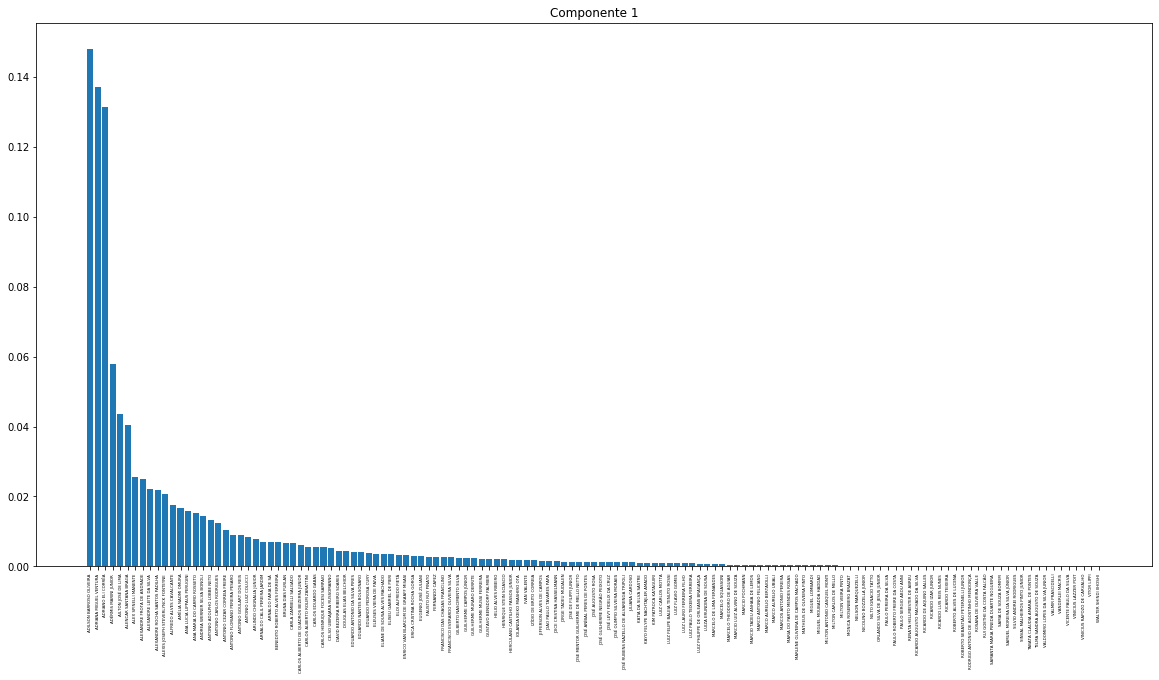

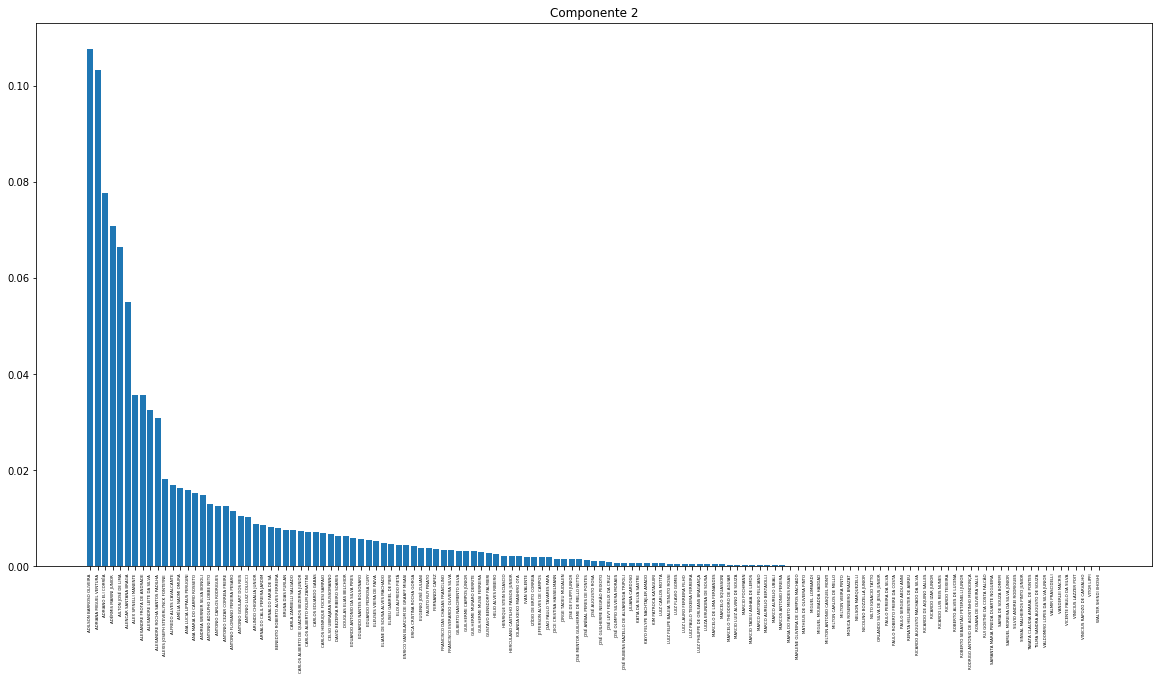

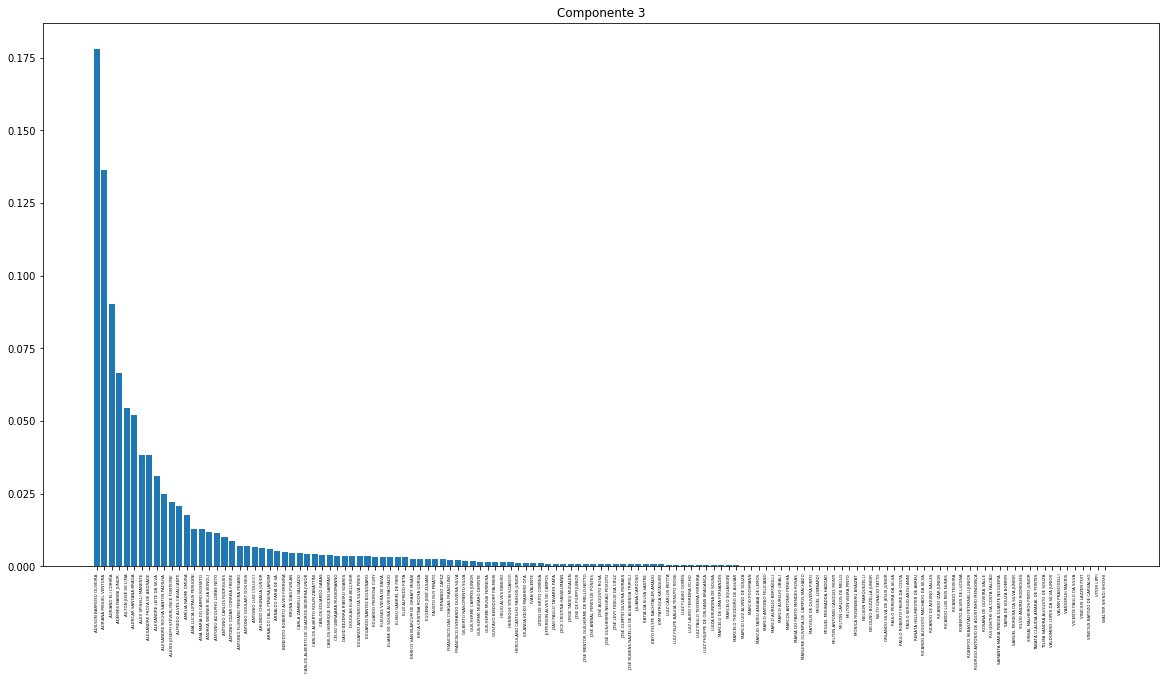

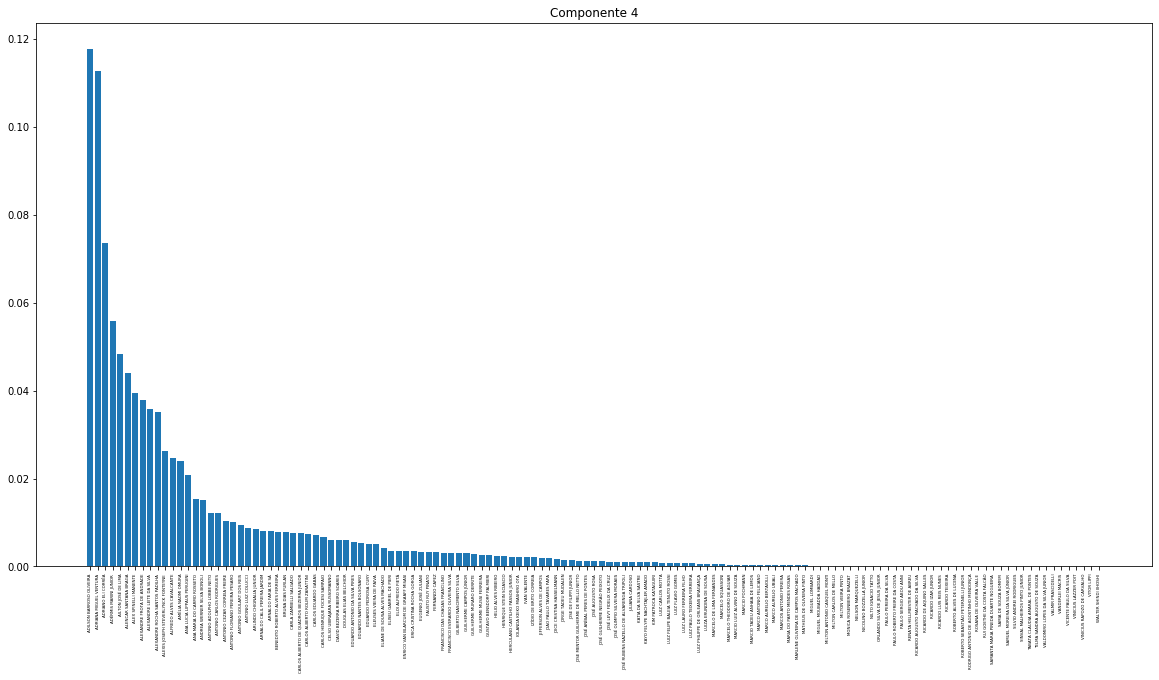

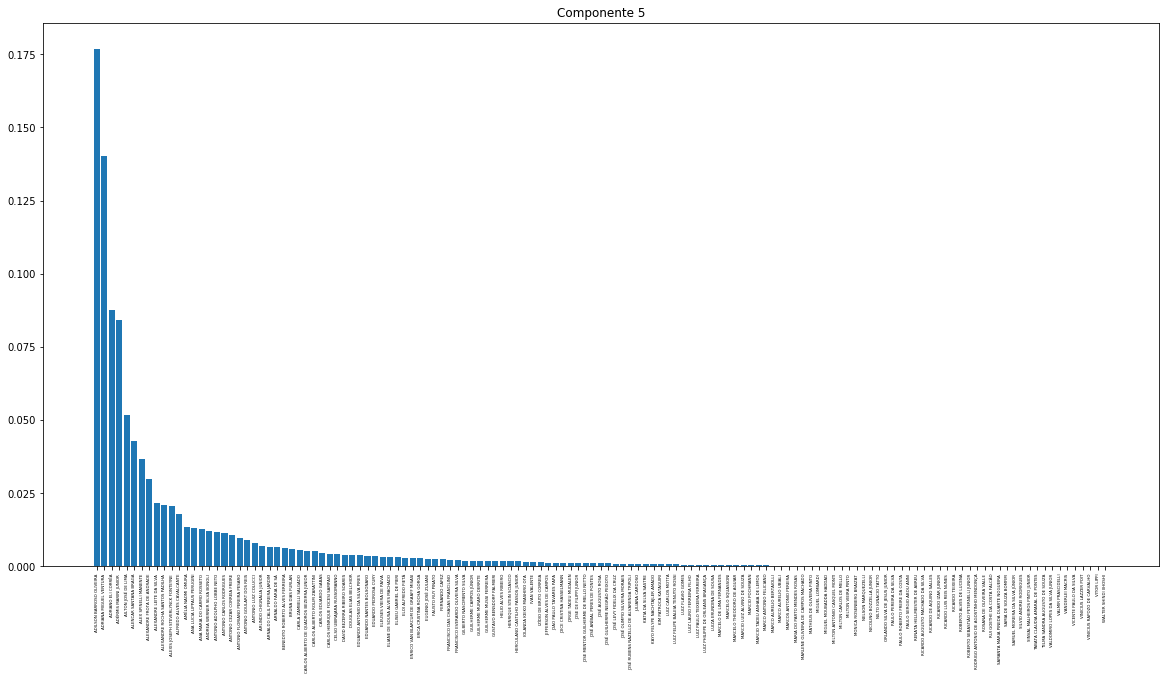

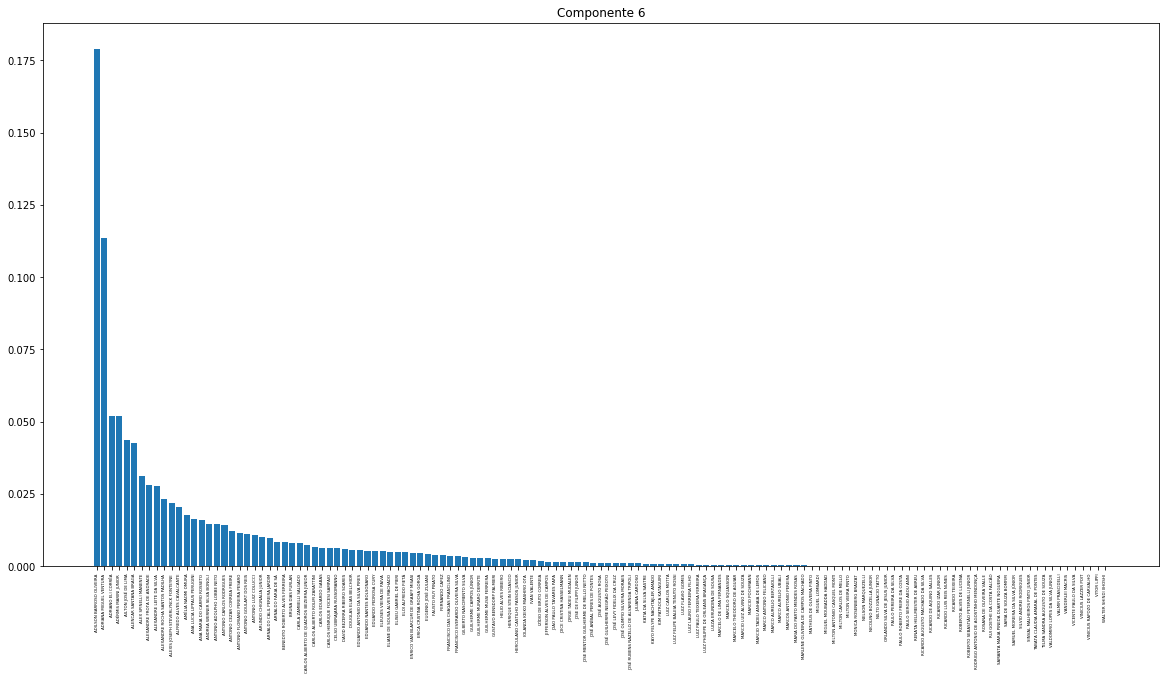

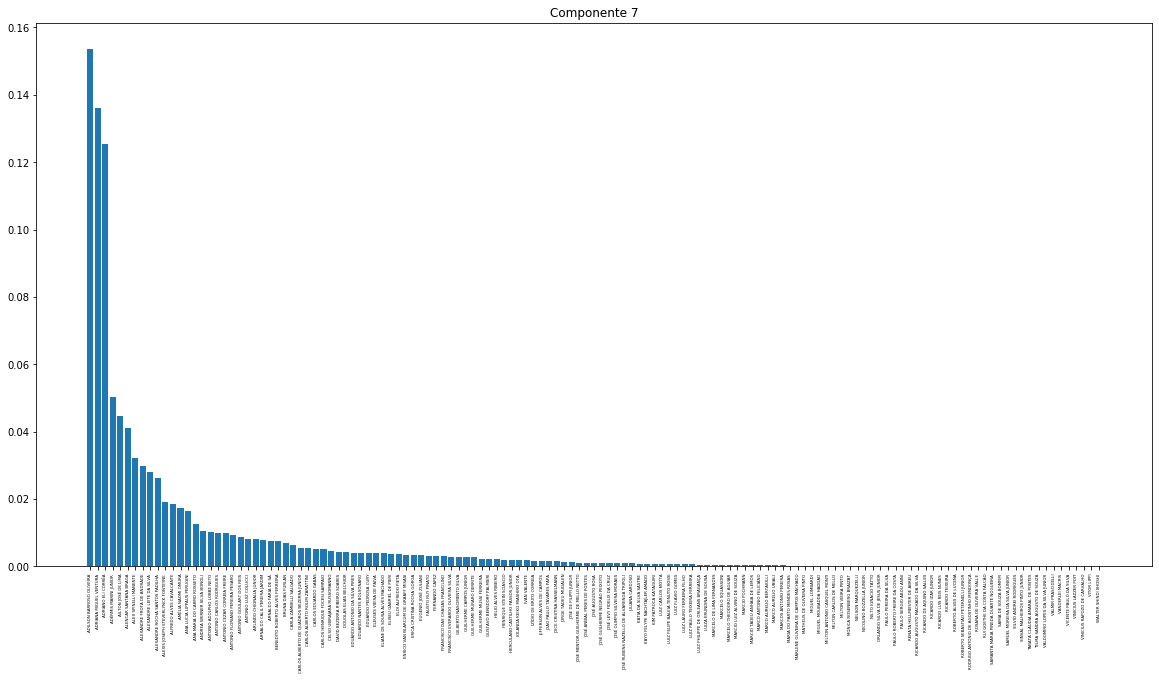

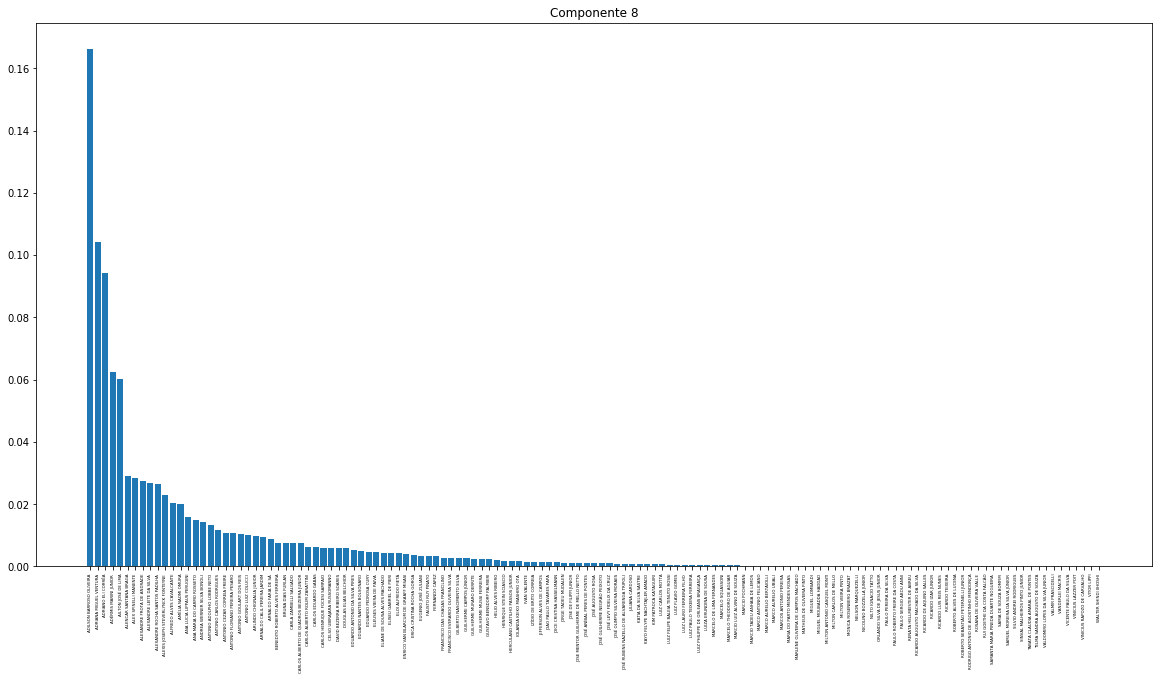

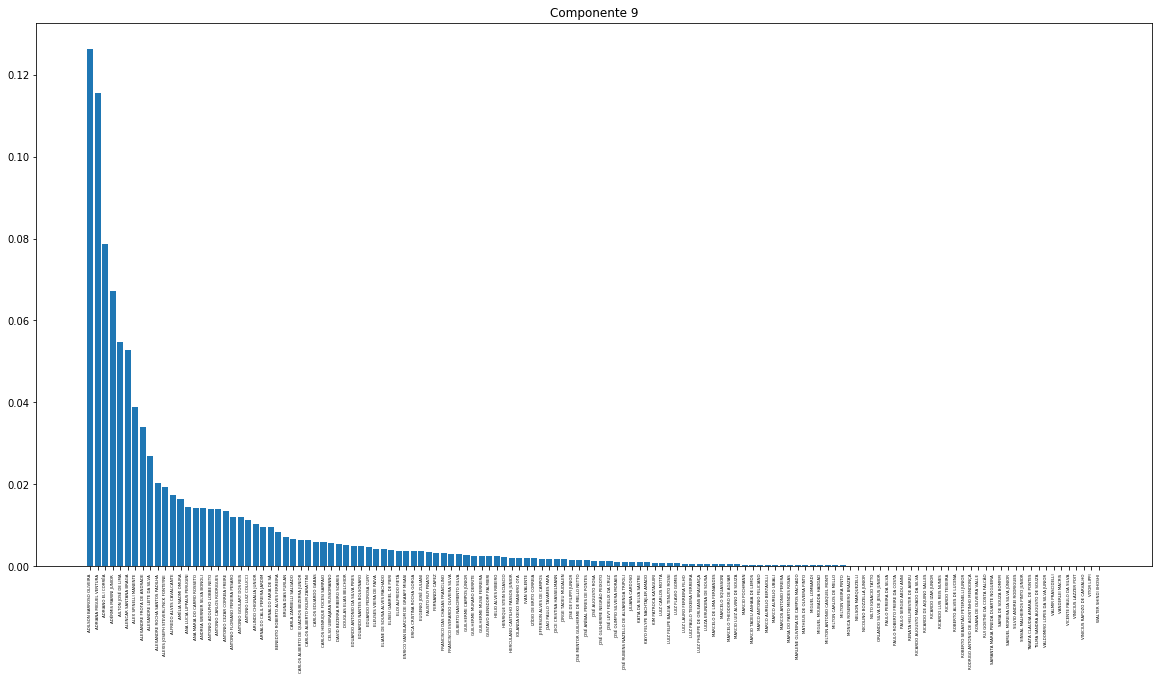

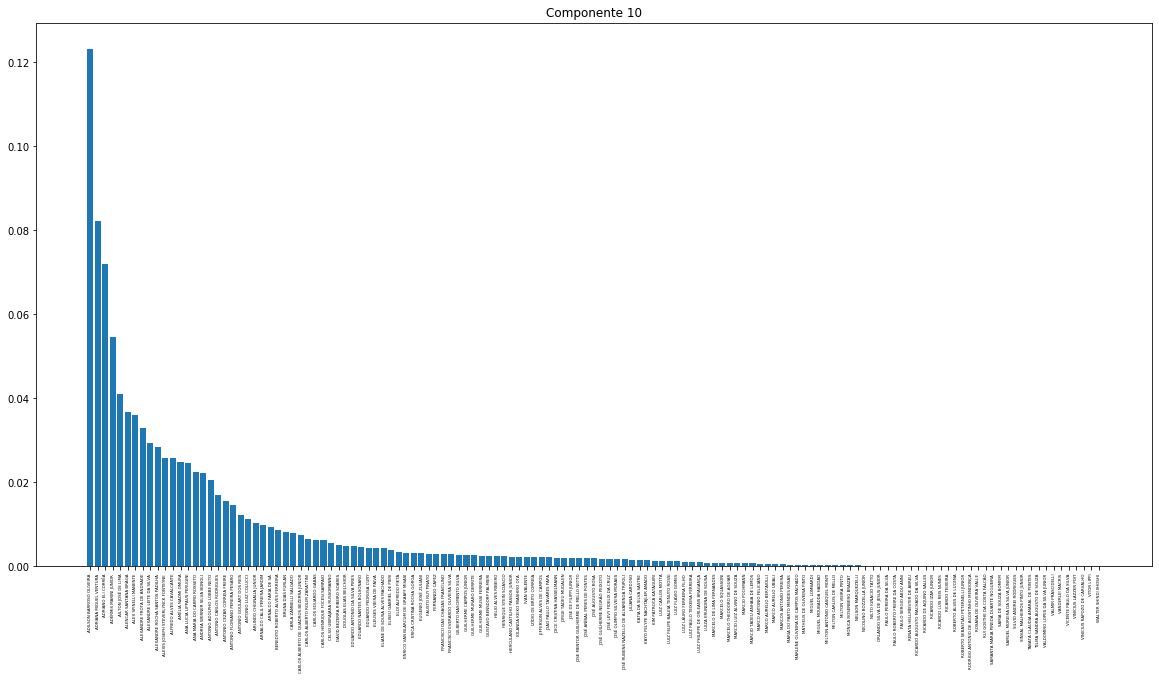

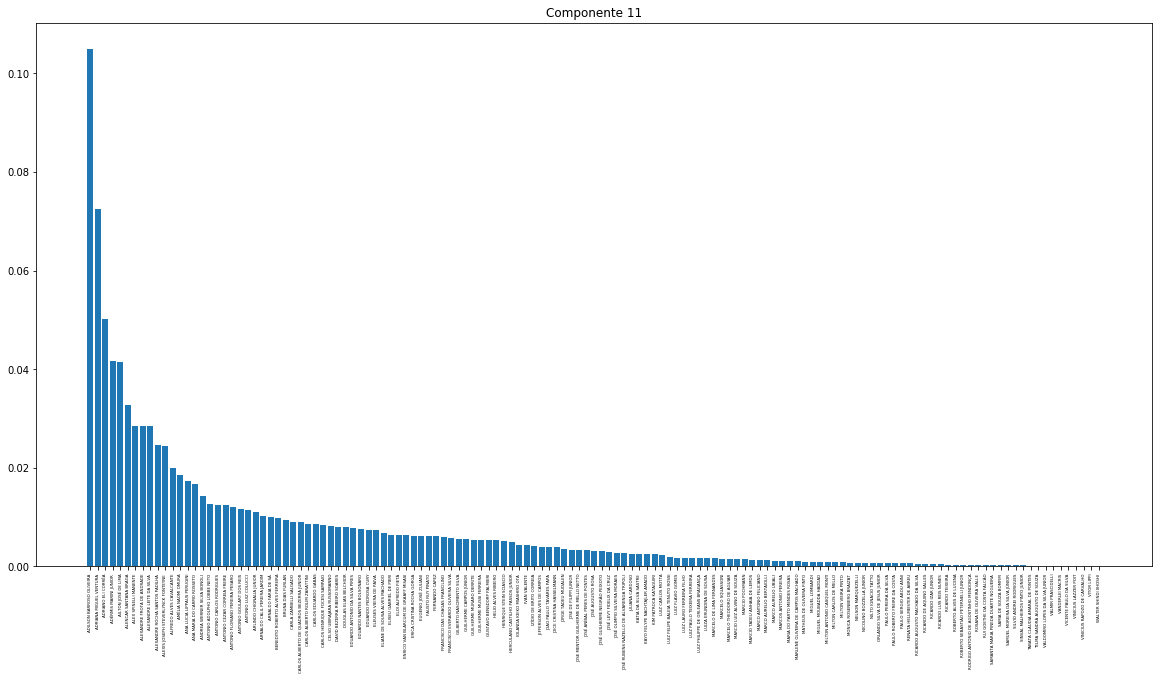

In [53]:
for i in range(len(componentes.index)):
    plt.figure(figsize=(20,10))
    current_component = componentes.iloc[i,:].copy()
    current_component.sort_values(ascending = False, inplace = True)
    plt.bar(componentes.columns,current_component)
    plt.xticks(fontsize=4,rotation=90)
    plt.title(componentes.index[i])
    plt.show()

#### Vamos plotar os componentes para visualizar onde eles estão localizados no estado de São Paulo

In [32]:
# usaremos geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

# importando shapefiles
sp = gpd.read_file('.\\python mapa\\sp_municipios\\35MUE250GC_SIR.shp')
sp

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÃ,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5..."
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6..."
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4..."
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3..."
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((-52.44569 -22.60828, -52.44569 -22.6..."
...,...,...,...
640,NOVA INDEPENDÃNCIA,3533205,"POLYGON ((-51.47556 -21.04971, -51.47459 -21.0..."
641,PIRAPOZINHO,3539202,"POLYGON ((-51.47369 -22.19974, -51.47334 -22.1..."
642,PRESIDENTE PRUDENTE,3541406,"POLYGON ((-51.28281 -21.72270, -51.28278 -21.7..."
643,SANTO EXPEDITO,3548302,"POLYGON ((-51.36795 -21.74799, -51.36735 -21.7..."


#### Temos um problema aqui: os nomes dos municípios do shapefile e do output do modelo estão diferentes. A gente precisa de um jeito para fazer o match entre os componentes e o shapefile. Assim sendo, vamos usar o código do município. Importaremos de novo a nossa base de dados para retirar apenas o código dos municípios.

In [33]:
# vamos pegar os IDs:
ID = pd.read_csv("H:\\OneDrive\\FGV\\6 semestre\\GVCODE Projetos\\LDA\\O tal do\\Bases de dado intermediárias\\Tudo Acentuado Finalmente.csv")
ID = ID.iloc[:,[2,3]] # selecionando o nome e código do município
ID = ID.drop_duplicates().sort_values(by=["NM_MUNICIPIO"]) # ordenando alfabeticamente
ID.set_index(ID['CD_MUNICIPIO'],inplace=True)
ID.drop('CD_MUNICIPIO',axis=1,inplace=True)
ID

,NM_MUNICIPIO
CD_MUNICIPIO,
61018,ADAMANTINA
61034,ADOLFO
61050,AGUAÍ
61131,AGUDOS
61581,ALAMBARI
...,...
61115,ÁGUAS DE SÃO PEDRO
61239,ÁLVARES FLORENCE
61255,ÁLVARES MACHADO


In [34]:
# incorporando os IDs no outputo do modelo
municipios.reset_index(inplace=True)
municipios.set_index(ID.index,inplace=True)
municipios.reset_index(inplace=True)
municipios.sort_values(by="CD_MUNICIPIO",inplace=True)
municipios.rename(columns={"CD_MUNICIPIO":"TSEcod"},inplace=True)
municipios

,TSEcod,Município,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,...,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20
170,61000,EUCLIDES DA CUNHA PAULISTA,2.761668e-09,2.761668e-09,2.761668e-09,8.003541e-02,2.761668e-09,2.125660e-01,7.409129e-03,2.761668e-09,...,2.761668e-09,3.040350e-03,2.761668e-09,2.761668e-09,2.117151e-03,2.761668e-09,2.761668e-09,6.426198e-01,2.214669e-02,2.761668e-09
0,61018,ADAMANTINA,5.356063e-02,4.285322e-03,2.275399e-03,4.874843e-01,7.644675e-10,4.578399e-02,7.030375e-02,9.376275e-02,...,5.941323e-03,1.224589e-02,1.280093e-03,9.570077e-03,1.778053e-03,7.644675e-10,6.074549e-03,1.182165e-01,7.644675e-10,3.842238e-02
75,61026,BOREBI,7.968126e-09,7.968126e-09,2.699327e-01,7.968126e-09,5.589098e-03,5.563721e-01,7.968126e-09,7.968126e-09,...,7.968126e-09,7.968126e-09,7.968126e-09,7.968126e-09,7.968126e-09,1.655591e-01,2.546845e-03,7.968126e-09,7.968126e-09,7.968126e-09
1,61034,ADOLFO,4.601932e-09,7.835041e-03,5.296411e-01,4.275160e-01,4.601932e-09,7.573940e-03,4.601932e-09,4.601932e-09,...,4.601932e-09,4.601932e-09,2.455182e-02,4.601932e-09,4.601932e-09,4.601932e-09,2.882124e-03,4.601932e-09,4.601932e-09,4.601932e-09
596,61042,TARUMÃ,1.539172e-09,3.979396e-02,1.539172e-09,5.774273e-01,1.539172e-09,1.925617e-01,1.539172e-09,7.834011e-02,...,1.539172e-09,1.539172e-09,1.539172e-09,1.539172e-09,1.539172e-09,2.300186e-02,1.539172e-09,6.970836e-02,1.539172e-09,1.539172e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,72397,VIRADOURO,1.340303e-09,4.630242e-03,6.989137e-01,5.895446e-02,1.340303e-09,1.340303e-09,1.340303e-09,1.340303e-09,...,3.579931e-03,2.164579e-04,6.086186e-02,1.905338e-02,1.340303e-09,7.009248e-04,1.056344e-03,1.340303e-09,1.340303e-09,1.340303e-09
631,72419,VISTA ALEGRE DO ALTO,1.202699e-01,3.396847e-02,5.587092e-01,1.581681e-01,3.529827e-09,3.529827e-09,3.529827e-09,3.529827e-09,...,3.529827e-09,3.529827e-09,3.677875e-02,1.888554e-02,3.529827e-09,3.529827e-09,3.529827e-09,3.529827e-09,9.031575e-03,6.640145e-03
633,72435,VOTORANTIM,2.592353e-10,2.303667e-03,1.916244e-02,3.501855e-02,2.089053e-03,1.160979e-03,1.451655e-02,3.060767e-03,...,2.710232e-03,2.136126e-03,2.592353e-10,5.817154e-04,8.759149e-01,2.592353e-10,1.151975e-03,2.592353e-10,2.592353e-10,2.592353e-10
634,72451,VOTUPORANGA,5.543468e-03,3.504223e-10,8.982006e-03,7.759460e-01,3.504223e-10,4.564370e-03,1.086812e-01,3.373113e-02,...,3.504223e-10,5.556353e-03,2.089286e-02,3.504223e-10,3.504223e-10,3.504223e-10,2.829804e-02,3.504223e-10,3.504223e-10,2.247155e-03


#### Temos outro problema: os códigos do shapefile e os códigos da base de dados do TSE não batem. Isso acontece porque o shapefile é do IBGE e a base de dados da eleição é do TSE... <br>
#### Precisamos de um de-para entre os códigos.

In [35]:
# importando o de-para entre os códigos:
codigo = pd.read_excel('H:\\OneDrive\\FGV\\6 semestre\\GVCODE Projetos\\LDA\\Copy of SRC_Municipios(2113).xlsx')
codigo = codigo[codigo.SiglaUF == "SP"] # selecionando apenas SP
codigo = codigo.drop(columns =["Ano","SiglaUF"]) # dropando colunas desnecessárias
codigo.drop_duplicates(inplace=True)
codigo.sort_values(by="TSEcod",inplace=True)
codigo.reset_index(inplace=True)
codigo.drop(columns = 'index',inplace=True)
codigo

,TSEcod,IBGEcod,Municipio
0,61000,3515350,EUCLIDES DA CUNHA PAULIST
1,61018,3500105,ADAMANTINA
2,61026,3507456,BOREBI
3,61034,3500204,ADOLFO
4,61042,3553955,TARUMA
...,...,...,...
648,72397,3556800,VIRADOURO
649,72419,3556909,VISTA ALEGRE DO ALTO
650,72435,3557006,VOTORANTIM
651,72451,3557105,VOTUPORANGA


In [36]:
# vamos fundir municipios e codigo em um dataframe
df1 = pd.merge(municipios, codigo, on='TSEcod')
df1

,TSEcod,Município,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,...,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,IBGEcod,Municipio
0,61000,EUCLIDES DA CUNHA PAULISTA,2.761668e-09,2.761668e-09,2.761668e-09,8.003541e-02,2.761668e-09,2.125660e-01,7.409129e-03,2.761668e-09,...,2.761668e-09,2.761668e-09,2.117151e-03,2.761668e-09,2.761668e-09,6.426198e-01,2.214669e-02,2.761668e-09,3515350,EUCLIDES DA CUNHA PAULIST
1,61018,ADAMANTINA,5.356063e-02,4.285322e-03,2.275399e-03,4.874843e-01,7.644675e-10,4.578399e-02,7.030375e-02,9.376275e-02,...,1.280093e-03,9.570077e-03,1.778053e-03,7.644675e-10,6.074549e-03,1.182165e-01,7.644675e-10,3.842238e-02,3500105,ADAMANTINA
2,61026,BOREBI,7.968126e-09,7.968126e-09,2.699327e-01,7.968126e-09,5.589098e-03,5.563721e-01,7.968126e-09,7.968126e-09,...,7.968126e-09,7.968126e-09,7.968126e-09,1.655591e-01,2.546845e-03,7.968126e-09,7.968126e-09,7.968126e-09,3507456,BOREBI
3,61034,ADOLFO,4.601932e-09,7.835041e-03,5.296411e-01,4.275160e-01,4.601932e-09,7.573940e-03,4.601932e-09,4.601932e-09,...,2.455182e-02,4.601932e-09,4.601932e-09,4.601932e-09,2.882124e-03,4.601932e-09,4.601932e-09,4.601932e-09,3500204,ADOLFO
4,61042,TARUMÃ,1.539172e-09,3.979396e-02,1.539172e-09,5.774273e-01,1.539172e-09,1.925617e-01,1.539172e-09,7.834011e-02,...,1.539172e-09,1.539172e-09,1.539172e-09,2.300186e-02,1.539172e-09,6.970836e-02,1.539172e-09,1.539172e-09,3553955,TARUMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,72397,VIRADOURO,1.340303e-09,4.630242e-03,6.989137e-01,5.895446e-02,1.340303e-09,1.340303e-09,1.340303e-09,1.340303e-09,...,6.086186e-02,1.905338e-02,1.340303e-09,7.009248e-04,1.056344e-03,1.340303e-09,1.340303e-09,1.340303e-09,3556800,VIRADOURO
649,72419,VISTA ALEGRE DO ALTO,1.202699e-01,3.396847e-02,5.587092e-01,1.581681e-01,3.529827e-09,3.529827e-09,3.529827e-09,3.529827e-09,...,3.677875e-02,1.888554e-02,3.529827e-09,3.529827e-09,3.529827e-09,3.529827e-09,9.031575e-03,6.640145e-03,3556909,VISTA ALEGRE DO ALTO
650,72435,VOTORANTIM,2.592353e-10,2.303667e-03,1.916244e-02,3.501855e-02,2.089053e-03,1.160979e-03,1.451655e-02,3.060767e-03,...,2.592353e-10,5.817154e-04,8.759149e-01,2.592353e-10,1.151975e-03,2.592353e-10,2.592353e-10,2.592353e-10,3557006,VOTORANTIM
651,72451,VOTUPORANGA,5.543468e-03,3.504223e-10,8.982006e-03,7.759460e-01,3.504223e-10,4.564370e-03,1.086812e-01,3.373113e-02,...,2.089286e-02,3.504223e-10,3.504223e-10,3.504223e-10,2.829804e-02,3.504223e-10,3.504223e-10,2.247155e-03,3557105,VOTUPORANGA


In [37]:
# renomeando a coluna de códigos
df1.rename(columns={"IBGEcod":"CD_GEOCMU"},inplace=True)
df1.CD_GEOCMU = df1.CD_GEOCMU.astype(int) # transformando em int

# fundindo o municipios com códigos certos com o shapefile
sp.CD_GEOCMU = sp.CD_GEOCMU.astype(int)
df2 = pd.merge(sp, df1, on='CD_GEOCMU')
df2

,NM_MUNICIP,CD_GEOCMU,geometry,TSEcod,Município,Component 1,Component 2,Component 3,Component 4,Component 5,...,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Municipio
0,CAIUÃ,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5...",62839,CAIUÁ,5.186721e-09,5.186721e-09,5.186721e-09,0.438777,5.186721e-09,...,5.186721e-09,5.186721e-09,5.186721e-09,5.186721e-09,5.186721e-09,5.186721e-09,2.478411e-01,5.186721e-09,5.186721e-09,CAIUA
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6...",63215,CASTILHO,1.789222e-02,1.496110e-09,1.496110e-09,0.668757,1.496110e-09,...,1.496110e-09,1.023051e-03,1.496110e-09,1.496110e-09,1.496110e-09,1.496110e-09,3.374363e-02,3.328398e-02,1.496110e-09,CASTILHO
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4...",63894,DRACENA,9.106671e-04,5.065021e-03,5.523464e-02,0.539896,6.001233e-04,...,8.012462e-03,1.281985e-03,2.209777e-03,5.656109e-10,5.656109e-10,2.521209e-03,9.018589e-02,1.843856e-02,5.656109e-10,DRACENA
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...",64050,ESTRELA D OESTE,9.226371e-02,1.047932e-03,3.929273e-09,0.877735,3.929273e-09,...,3.929273e-09,3.929273e-09,3.929273e-09,3.929273e-09,3.929273e-09,3.929273e-09,2.036442e-03,3.929273e-09,3.929273e-09,ESTRELA DO NORTE
4,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3...",64076,ESTRELA DO NORTE,7.788161e-09,7.788161e-09,6.921108e-02,0.266290,7.788161e-09,...,7.788161e-09,7.788161e-09,7.788161e-09,7.788161e-09,7.788161e-09,7.788161e-09,4.945428e-01,7.788161e-09,7.788161e-09,ESTRELA DO NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,NOVA INDEPENDÃNCIA,3533205,"POLYGON ((-51.47556 -21.04971, -51.47459 -21.0...",67652,NOVA INDEPENDÊNCIA,1.257802e-02,7.082152e-09,1.447950e-02,0.844688,2.476917e-03,...,7.082152e-09,7.082152e-09,7.082152e-09,7.082152e-09,4.304954e-04,7.082152e-09,7.082152e-09,7.082152e-09,8.448012e-03,NOVA INDEPENDENCIA
649,PIRAPOZINHO,3539202,"POLYGON ((-51.47369 -22.19974, -51.47334 -22.1...",68853,PIRAPOZINHO,1.088021e-09,1.088021e-09,1.088021e-09,0.030142,1.088021e-09,...,1.088021e-09,1.088021e-09,2.058598e-03,5.436035e-02,4.151469e-04,1.088021e-09,4.245225e-01,1.088021e-09,1.088021e-09,PIRAPOZINHO
650,PRESIDENTE PRUDENTE,3541406,"POLYGON ((-51.28281 -21.72270, -51.28278 -21.7...",69299,PRESIDENTE PRUDENTE,5.108020e-04,1.708934e-10,3.496617e-03,0.069507,1.708934e-10,...,1.708934e-10,1.708934e-10,3.666649e-03,2.871618e-03,1.708934e-10,3.321780e-03,6.476254e-01,9.085816e-04,1.708934e-10,PRESIDENTE PRUDENTE
651,SANTO EXPEDITO,3548302,"POLYGON ((-51.36795 -21.74799, -51.36735 -21.7...",70670,SANTO EXPEDITO,2.900299e-01,1.406469e-08,1.406469e-08,0.199810,1.406469e-08,...,1.406469e-08,1.406469e-08,1.406469e-08,1.406469e-08,1.406469e-08,1.406469e-08,3.989243e-01,1.406469e-08,1.406469e-08,SANTO EXPEDITO


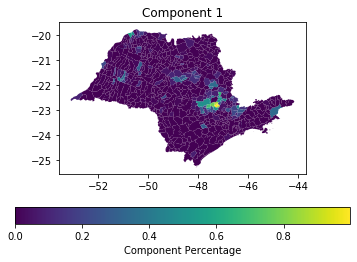

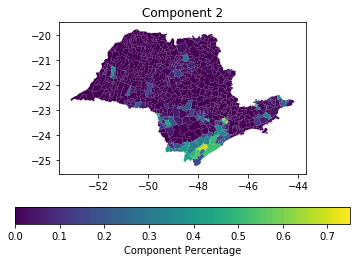

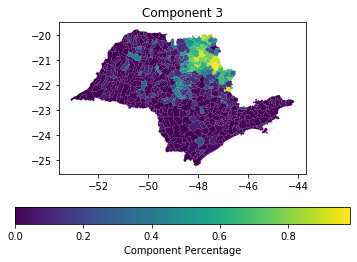

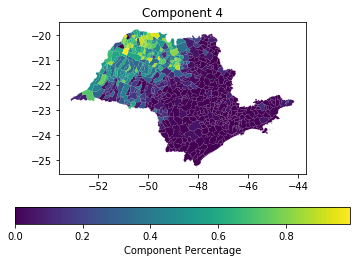

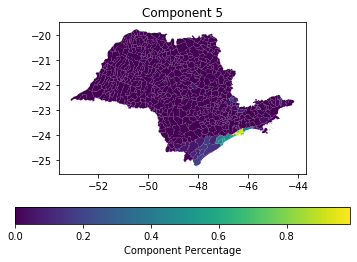

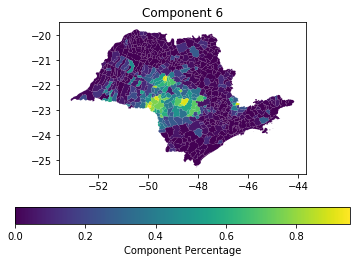

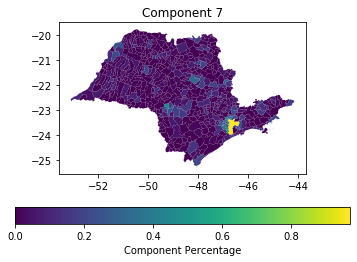

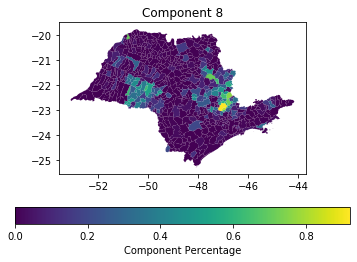

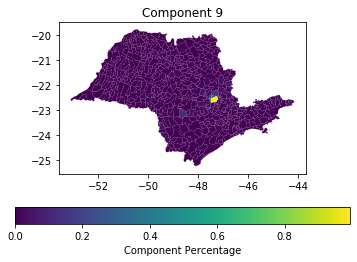

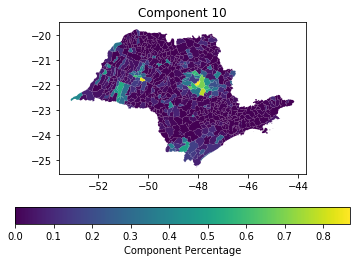

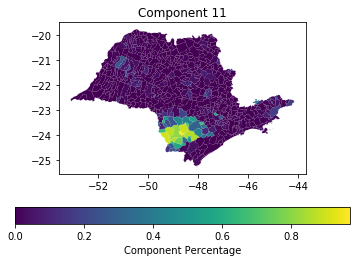

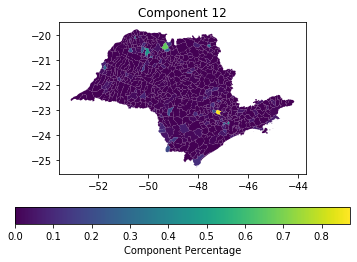

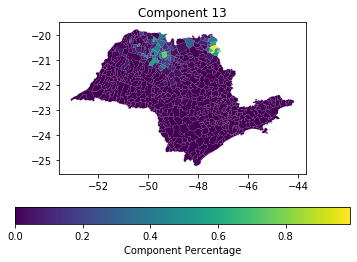

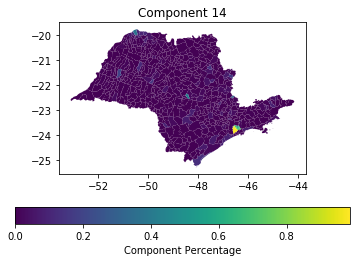

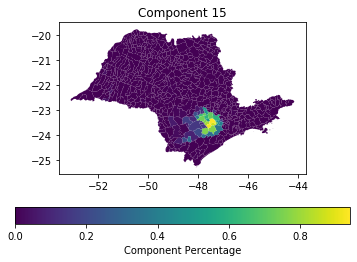

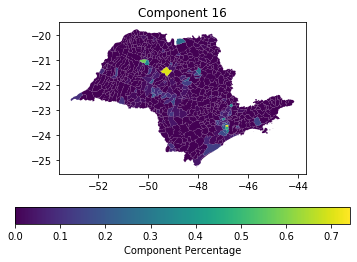

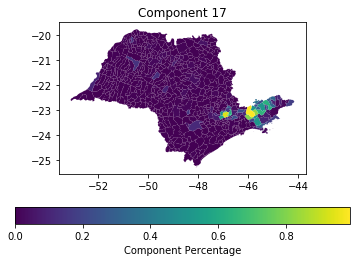

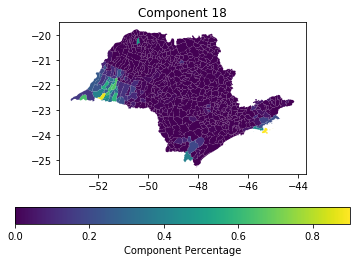

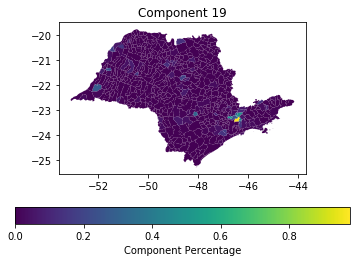

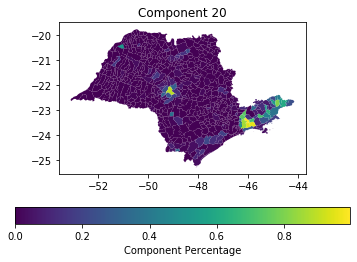

In [39]:
# plotando o mapa
for i in [f"Component {i}" for i in range (1,21)]:
    fig, ax = plt.subplots(1, 1)
    ax.set_title(i)
    df2.plot(column=i, legend=True, ax=ax, legend_kwds={'label': "Component Percentage",'orientation': "horizontal"})
    plt.savefig(f"{i}.png")

# Analisando resultados de regiões diferentes

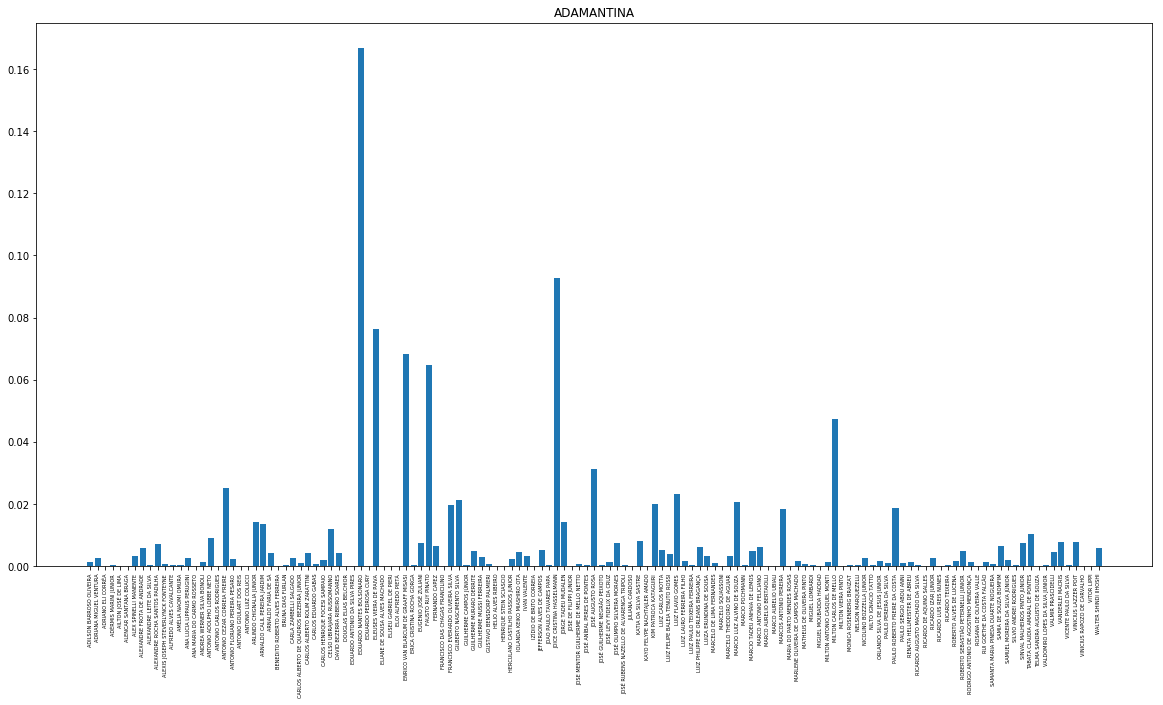

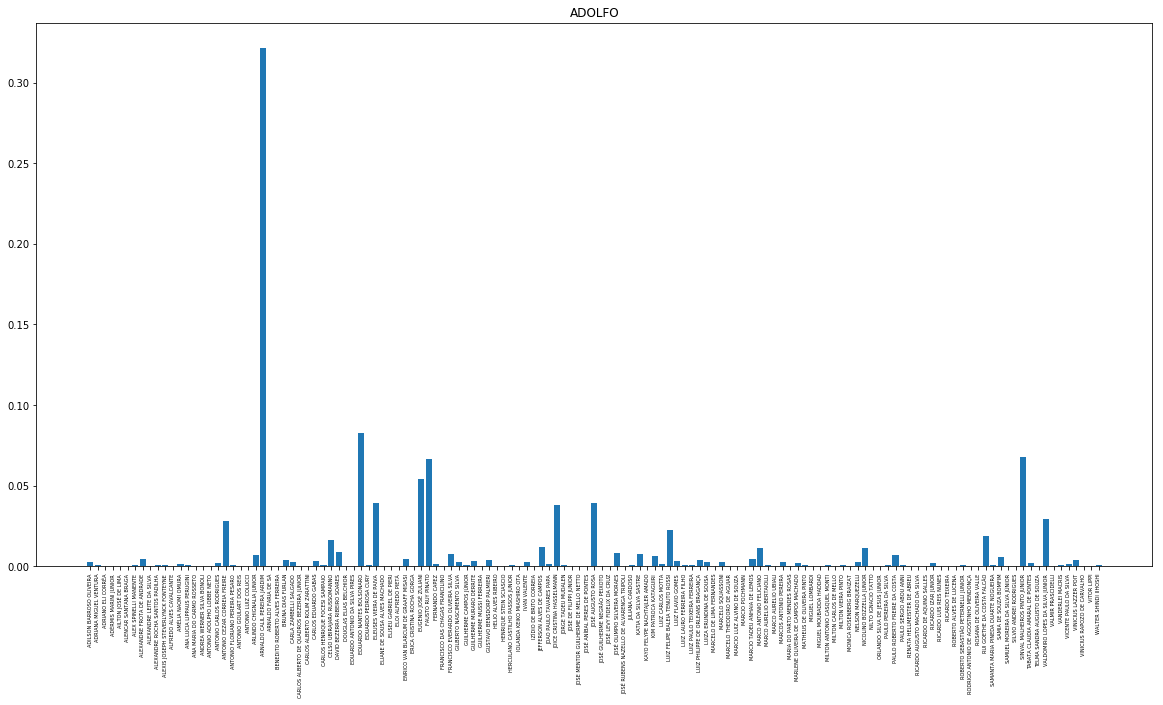

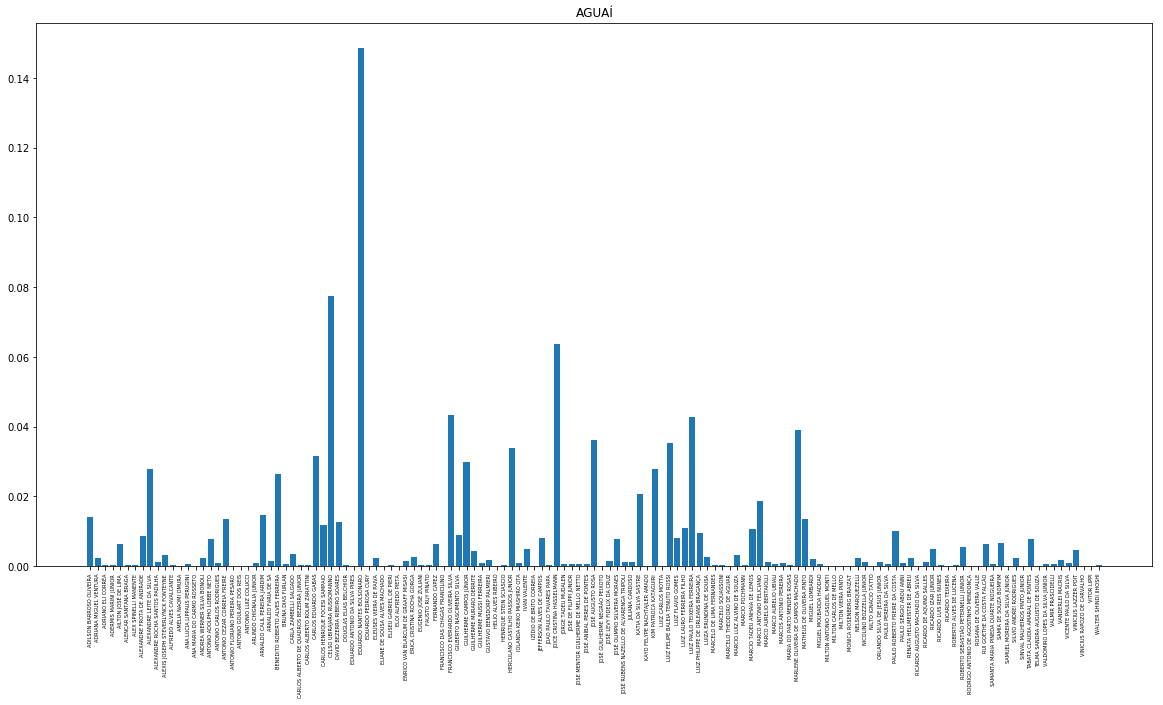

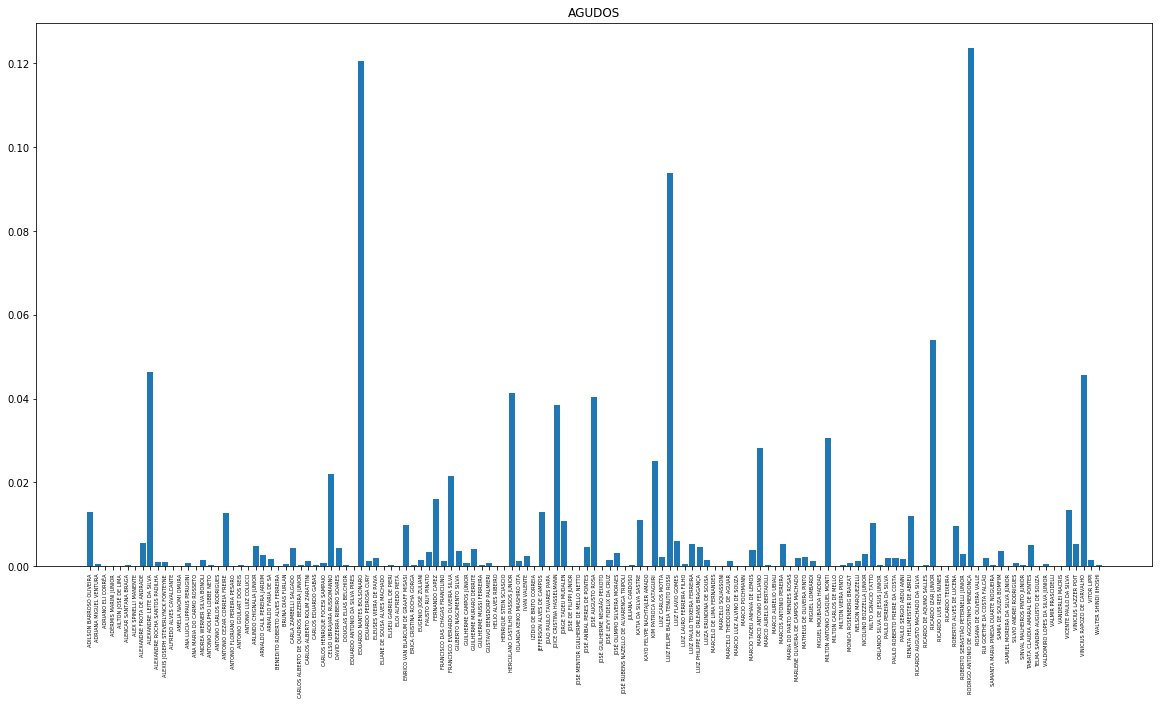

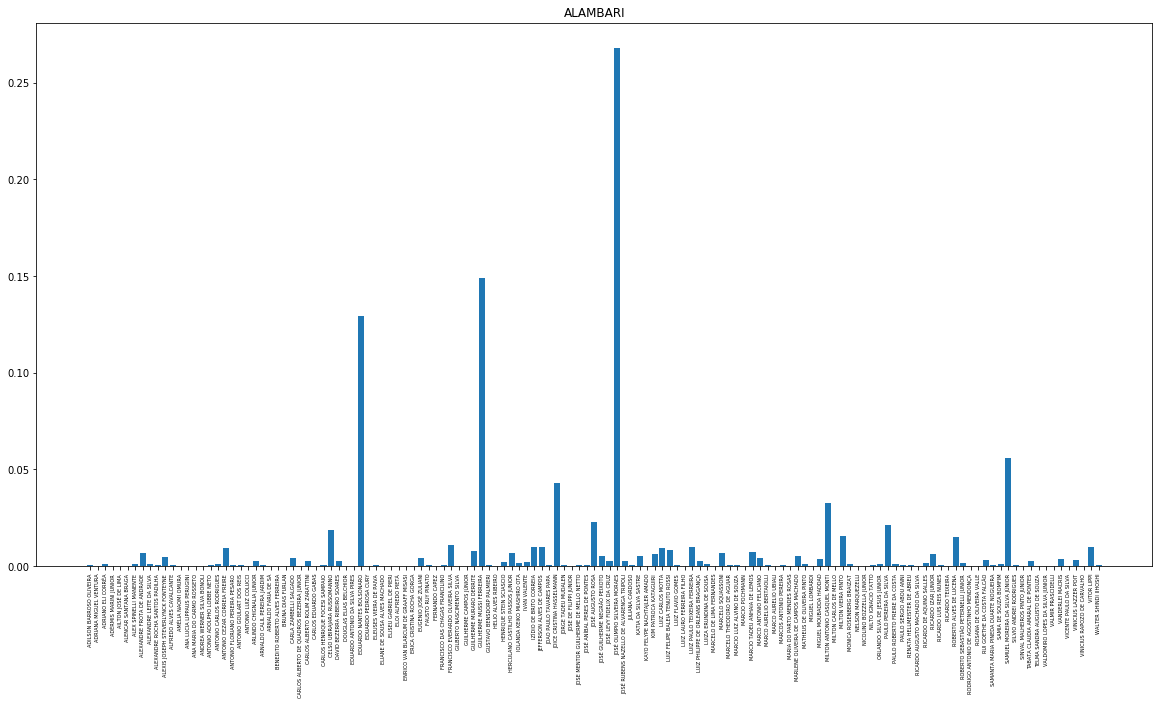

In [19]:
# tem que transformar em porcentagem.
xxx = (df.T / df.T.sum()).T

for j in range(5):
# plot
    plt.figure(figsize=(20,10))
    plt.bar(xxx.columns,xxx.iloc[j,:])
    plt.title(xxx.index[j])
    plt.xticks(fontsize=5,rotation=90)
    plt.show()

In [14]:
df.index[0]

'ADAMANTINA'

# Será que o partido explica os componentes?

In [8]:
# vamos criar um de-para entre partidos e candidatos
partidos = pd.read_csv(".\\Bases de dado intermediárias\\Tudo Acentuado Finalmente.csv")
partidos = partidos.loc[:,['NM_CANDIDATO','SG_PARTIDO']]
partidos

,NM_CANDIDATO,SG_PARTIDO
0,ADÉRMIS MARINI JUNIOR,PSDB
1,ADILSON BARROSO OLIVEIRA,PATRI
2,ADRIANA MIGUEL VENTURA,NOVO
3,ADRIANO ELI CORRÊA,DEM
4,AILTON JOSÉ DE LIMA,PSD
...,...,...
87070,VICENTE PAULO DA SILVA,PT
87071,VINICIUS LAZZER POIT,NOVO
87072,VINICIUS RAPOZO DE CARVALHO,PRB
87073,VITOR LIPPI,PSDB


In [11]:
# acho estranho 87075 candidatos...
partidos.NM_CANDIDATO.value_counts()

ARNALDO CALIL PEREIRA JARDIM    645
LUIZ PAULO TEIXEIRA FERREIRA    645
GILBERTO NASCIMENTO SILVA       645
LUIZ CARLOS MOTTA               645
FERNANDO CAPEZ                  645
                               ... 
RICARDO LUIS REIS NUNES         645
MARCO AURELIO BERTAIOLLI        645
RUI GOETHE DA COSTA FALCÃO      645
AMÉLIA NAOMI OMURA              645
EDUARDO PEDROSA CURY            645
Name: NM_CANDIDATO, Length: 135, dtype: int64

In [14]:
# droping the duplicates
partidos.drop_duplicates(inplace=True)

In [20]:
# let's see the reults
partidos

,NM_CANDIDATO,SG_PARTIDO
0,ADÉRMIS MARINI JUNIOR,PSDB
1,ADILSON BARROSO OLIVEIRA,PATRI
2,ADRIANA MIGUEL VENTURA,NOVO
3,ADRIANO ELI CORRÊA,DEM
4,AILTON JOSÉ DE LIMA,PSD
...,...,...
130,VICENTE PAULO DA SILVA,PT
131,VINICIUS LAZZER POIT,NOVO
132,VINICIUS RAPOZO DE CARVALHO,PRB
133,VITOR LIPPI,PSDB


In [22]:
# reshaping the data 
componentes = componentes.T.reset_index()

In [28]:
# renaming the column
componentes['NM_CANDIDATO'] = componentes['index']
del componentes['index']

In [29]:
# let's see the reults
componentes

Component,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,NM_CANDIDATO
0,0.005927,0.002297,0.000905,0.001728,0.001220,0.001124,0.000943,1.588415e-03,0.000645,0.003082,...,0.002246,1.732374e-03,1.804668e-02,0.002756,0.005743,0.003067,7.097067e-03,0.001748,0.000975,ADILSON BARROSO OLIVEIRA
1,0.001179,0.003663,0.001333,0.008736,0.000666,0.003705,0.003272,1.719722e-03,0.004097,0.000750,...,0.002200,2.819418e-04,1.447971e-03,0.000960,0.000167,0.001823,9.931510e-05,0.002805,0.002023,ADRIANA MIGUEL VENTURA
2,0.000282,0.001909,0.000223,0.007652,0.000701,0.000098,0.018023,4.821361e-05,0.007027,0.000164,...,0.009026,3.234313e-02,8.770464e-06,0.000019,0.001685,0.000018,1.099205e-06,0.000338,0.001114,ADRIANO ELI CORRÊA
3,0.000112,0.000087,0.000041,0.000373,0.000045,0.000065,0.000054,7.649878e-02,0.000142,0.000104,...,0.000120,1.548721e-04,9.856680e-04,0.000081,0.000025,0.000087,9.921918e-06,0.000092,0.000167,ADÉRMIS MARINI JUNIOR
4,0.000121,0.000011,0.000288,0.000581,0.000015,0.000481,0.000469,1.426519e-04,0.043374,0.000135,...,0.000138,3.413282e-11,9.199958e-05,0.000878,0.000005,0.000149,1.934508e-05,0.000202,0.000047,AILTON JOSÉ DE LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.000586,0.001102,0.000680,0.002536,0.002128,0.001228,0.002526,5.769584e-04,0.049509,0.001312,...,0.000753,7.733810e-03,5.078831e-04,0.000227,0.011012,0.001508,1.534723e-03,0.001529,0.001334,VICENTE PAULO DA SILVA
131,0.006367,0.013578,0.005203,0.024684,0.003712,0.009961,0.017429,7.117462e-03,0.019804,0.003824,...,0.005221,1.902728e-03,7.370161e-03,0.003773,0.001330,0.010243,3.040311e-03,0.008047,0.007564,VINICIUS LAZZER POIT
132,0.025673,0.069676,0.000023,0.000523,0.044783,0.000009,0.000017,2.042160e-08,0.007545,0.015616,...,0.027756,1.479067e-10,1.637514e-11,0.000045,0.008946,0.000117,1.394520e-03,0.004290,0.000044,VINICIUS RAPOZO DE CARVALHO
133,0.000037,0.000340,0.000036,0.000342,0.002770,0.000069,0.000162,2.013307e-04,0.000146,0.000051,...,0.000025,1.031013e-03,2.614872e-05,0.000053,0.000238,0.000044,2.112851e-07,0.000031,0.293021,VITOR LIPPI


In [32]:
# juntando os dois dataframes para ter o partido de cada candidato
partidos_candidatos = componentes.merge(partidos,on='NM_CANDIDATO')

In [33]:
# let's see the reults
partidos_candidatos

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,NM_CANDIDATO,SG_PARTIDO
0,0.005927,0.002297,0.000905,0.001728,0.001220,0.001124,0.000943,1.588415e-03,0.000645,0.003082,...,1.732374e-03,1.804668e-02,0.002756,0.005743,0.003067,7.097067e-03,0.001748,0.000975,ADILSON BARROSO OLIVEIRA,PATRI
1,0.001179,0.003663,0.001333,0.008736,0.000666,0.003705,0.003272,1.719722e-03,0.004097,0.000750,...,2.819418e-04,1.447971e-03,0.000960,0.000167,0.001823,9.931510e-05,0.002805,0.002023,ADRIANA MIGUEL VENTURA,NOVO
2,0.000282,0.001909,0.000223,0.007652,0.000701,0.000098,0.018023,4.821361e-05,0.007027,0.000164,...,3.234313e-02,8.770464e-06,0.000019,0.001685,0.000018,1.099205e-06,0.000338,0.001114,ADRIANO ELI CORRÊA,DEM
3,0.000112,0.000087,0.000041,0.000373,0.000045,0.000065,0.000054,7.649878e-02,0.000142,0.000104,...,1.548721e-04,9.856680e-04,0.000081,0.000025,0.000087,9.921918e-06,0.000092,0.000167,ADÉRMIS MARINI JUNIOR,PSDB
4,0.000121,0.000011,0.000288,0.000581,0.000015,0.000481,0.000469,1.426519e-04,0.043374,0.000135,...,3.413282e-11,9.199958e-05,0.000878,0.000005,0.000149,1.934508e-05,0.000202,0.000047,AILTON JOSÉ DE LIMA,PSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.000586,0.001102,0.000680,0.002536,0.002128,0.001228,0.002526,5.769584e-04,0.049509,0.001312,...,7.733810e-03,5.078831e-04,0.000227,0.011012,0.001508,1.534723e-03,0.001529,0.001334,VICENTE PAULO DA SILVA,PT
131,0.006367,0.013578,0.005203,0.024684,0.003712,0.009961,0.017429,7.117462e-03,0.019804,0.003824,...,1.902728e-03,7.370161e-03,0.003773,0.001330,0.010243,3.040311e-03,0.008047,0.007564,VINICIUS LAZZER POIT,NOVO
132,0.025673,0.069676,0.000023,0.000523,0.044783,0.000009,0.000017,2.042160e-08,0.007545,0.015616,...,1.479067e-10,1.637514e-11,0.000045,0.008946,0.000117,1.394520e-03,0.004290,0.000044,VINICIUS RAPOZO DE CARVALHO,PRB
133,0.000037,0.000340,0.000036,0.000342,0.002770,0.000069,0.000162,2.013307e-04,0.000146,0.000051,...,1.031013e-03,2.614872e-05,0.000053,0.000238,0.000044,2.112851e-07,0.000031,0.293021,VITOR LIPPI,PSDB


In [34]:
# agrupando o dado em partidos
del partidos_candidatos['NM_CANDIDATO']
partidos_candidatos = partidos_candidatos.groupby(by='SG_PARTIDO').sum()

In [35]:
# let's see the reults
partidos_candidatos

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20
SG_PARTIDO,,,,,,,,,,,,,,,,,,,,
DEM,0.030287,0.042738,0.031955,0.079844,0.023289,0.042520,0.097725,0.038939,0.062294,0.031486,0.162140,0.050437,0.071753,0.056518,0.036365,0.085392,0.043522,0.164727,0.046482,0.051939
MDB,0.003568,0.006042,0.006962,0.013720,0.001603,0.003333,0.081891,0.003660,0.001533,0.005776,0.003178,0.004681,0.011087,0.240010,0.033363,0.008694,0.003837,0.010677,0.002138,0.008810
NOVO,0.010338,0.023468,0.009856,0.050862,0.006226,0.033077,0.048751,0.016223,0.030858,0.006032,0.013387,0.009899,0.003692,0.013606,0.008252,0.004645,0.016309,0.003393,0.014978,0.012661
PATRI,0.005927,0.002297,0.000905,0.001728,0.001220,0.001124,0.000943,0.001588,0.000645,0.003082,0.001258,0.002246,0.001732,0.018047,0.002756,0.005743,0.003067,0.007097,0.001748,0.000975
PC do B,0.002500,0.003654,0.003071,0.006214,0.000754,0.008481,0.000957,0.002619,0.006169,0.001303,0.004435,0.003956,0.000746,0.001420,0.000477,0.002897,0.001441,0.000707,0.004625,0.002810
PDT,0.006619,0.012612,0.006803,0.028563,0.007227,0.016400,0.013948,0.010972,0.020719,0.006863,0.011235,0.009078,0.003053,0.013930,0.005930,0.004717,0.017872,0.003285,0.018264,0.014532
PODE,0.025706,0.070046,0.025070,0.025981,0.014489,0.019324,0.035081,0.028310,0.019293,0.033296,0.032477,0.153858,0.025199,0.042020,0.012725,0.023296,0.024987,0.048239,0.021906,0.019898
PP,0.017744,0.012450,0.007732,0.031516,0.014822,0.010452,0.012277,0.008122,0.012895,0.006977,0.017401,0.017658,0.414423,0.010599,0.015893,0.151575,0.018500,0.213391,0.009716,0.027511
PPS,0.000963,0.000354,0.000228,0.003497,0.004021,0.000212,0.000452,0.000824,0.138504,0.004608,0.002798,0.000466,0.000501,0.027910,0.202104,0.009121,0.001605,0.008206,0.000625,0.002332


In [62]:
partidos_candidatos.index.values[-1] = 'SDD'

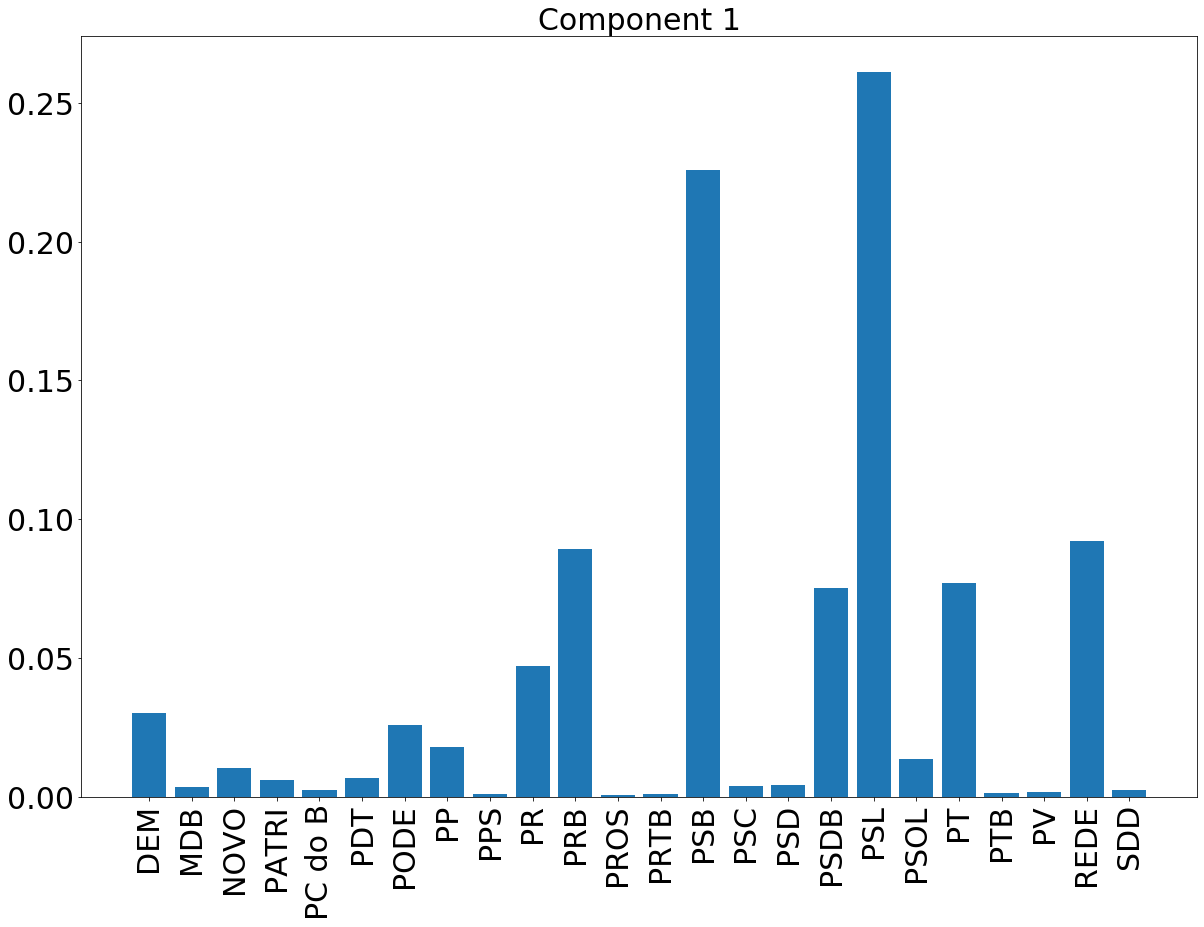

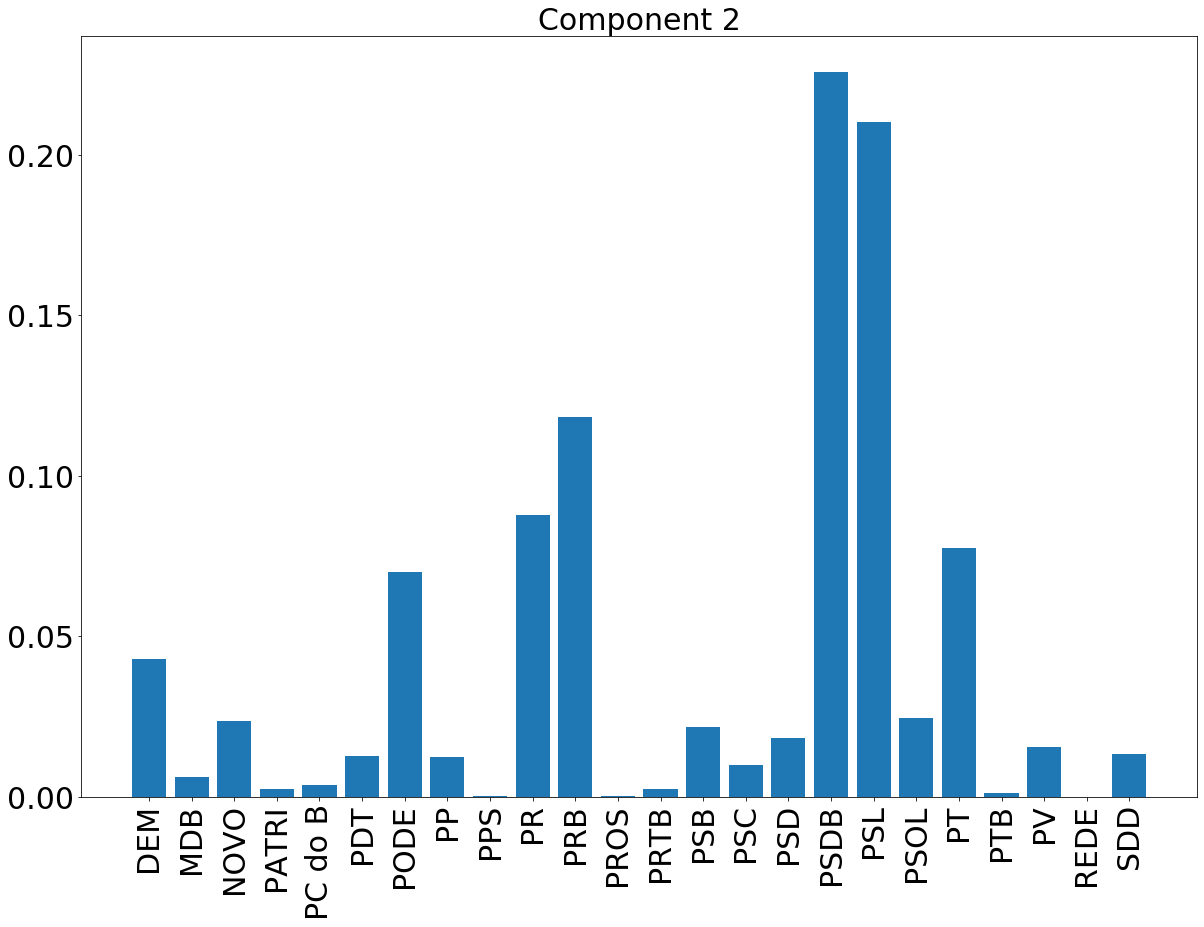

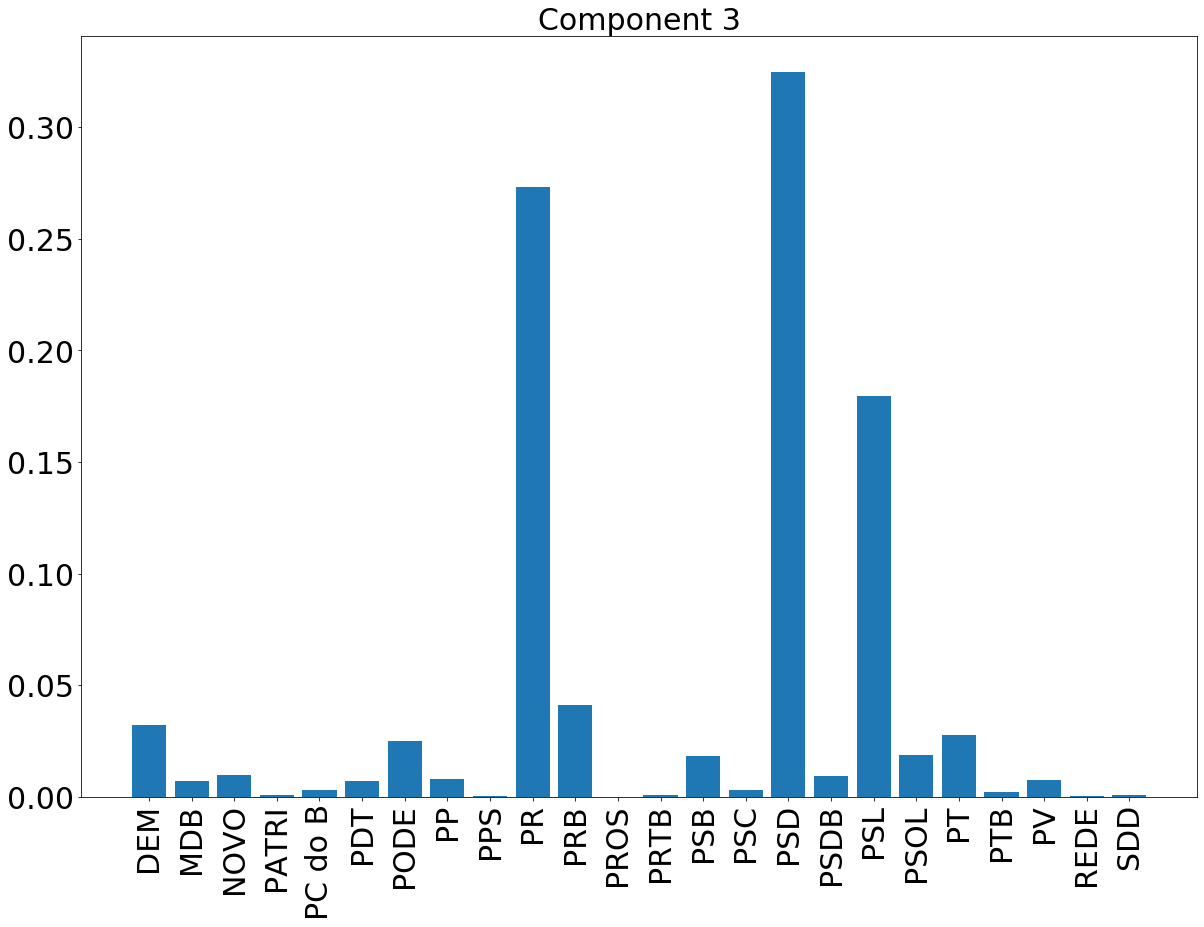

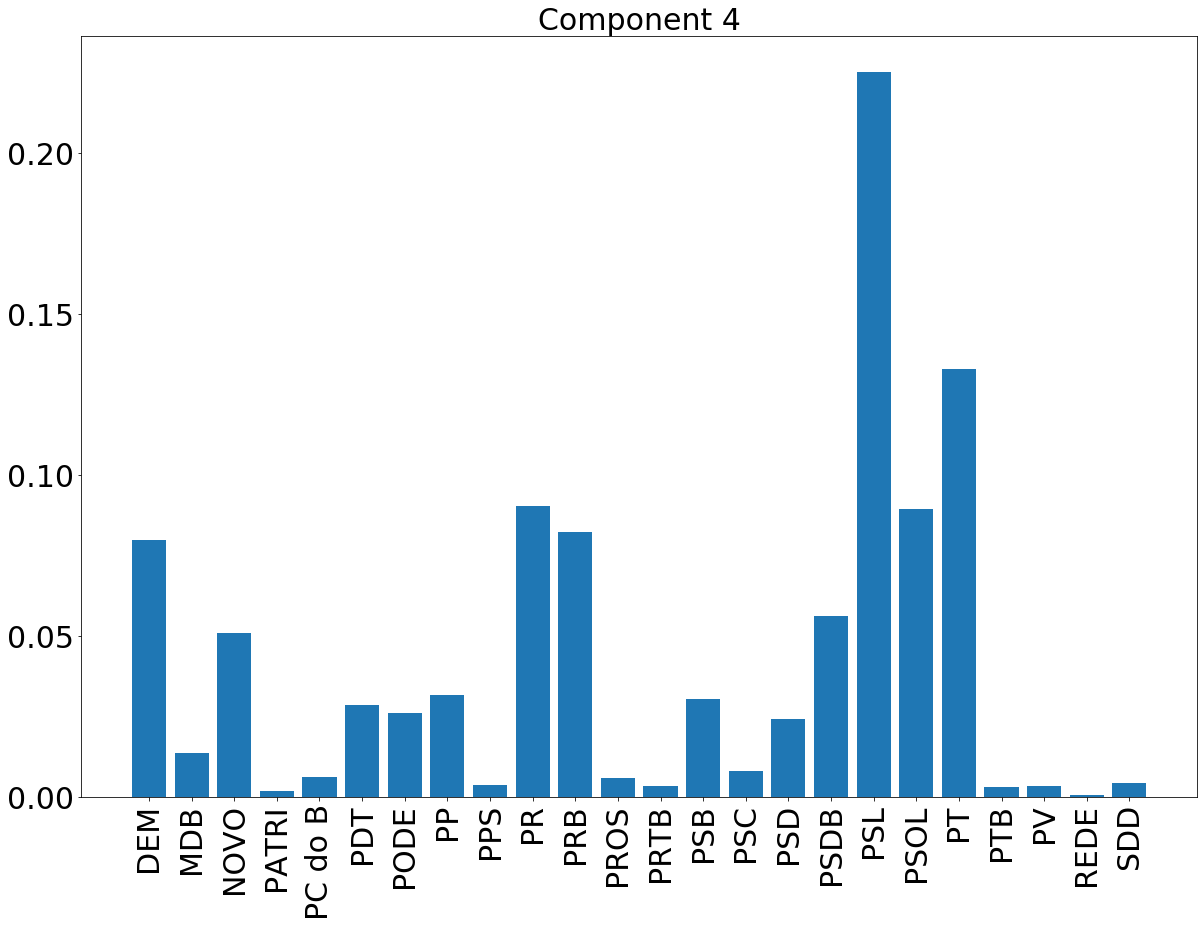

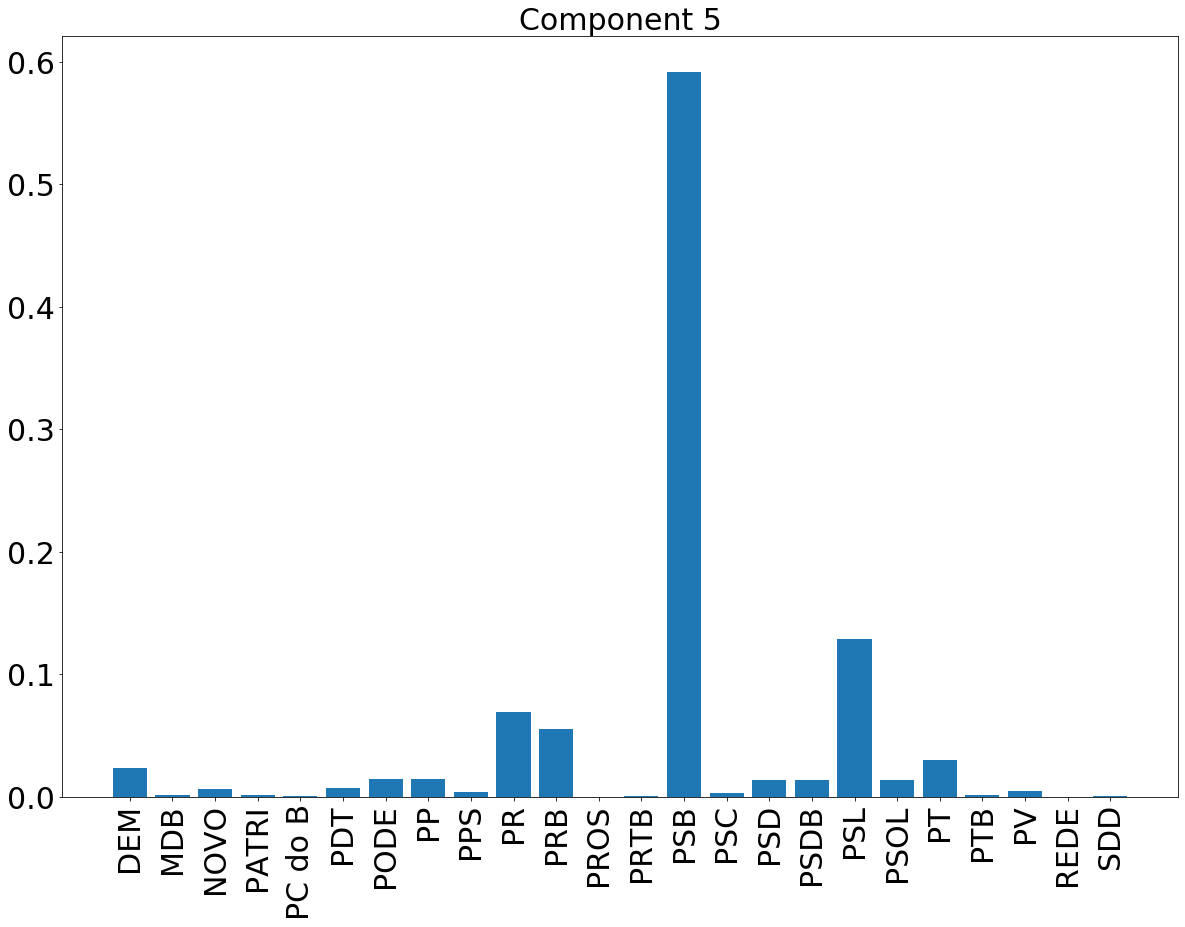

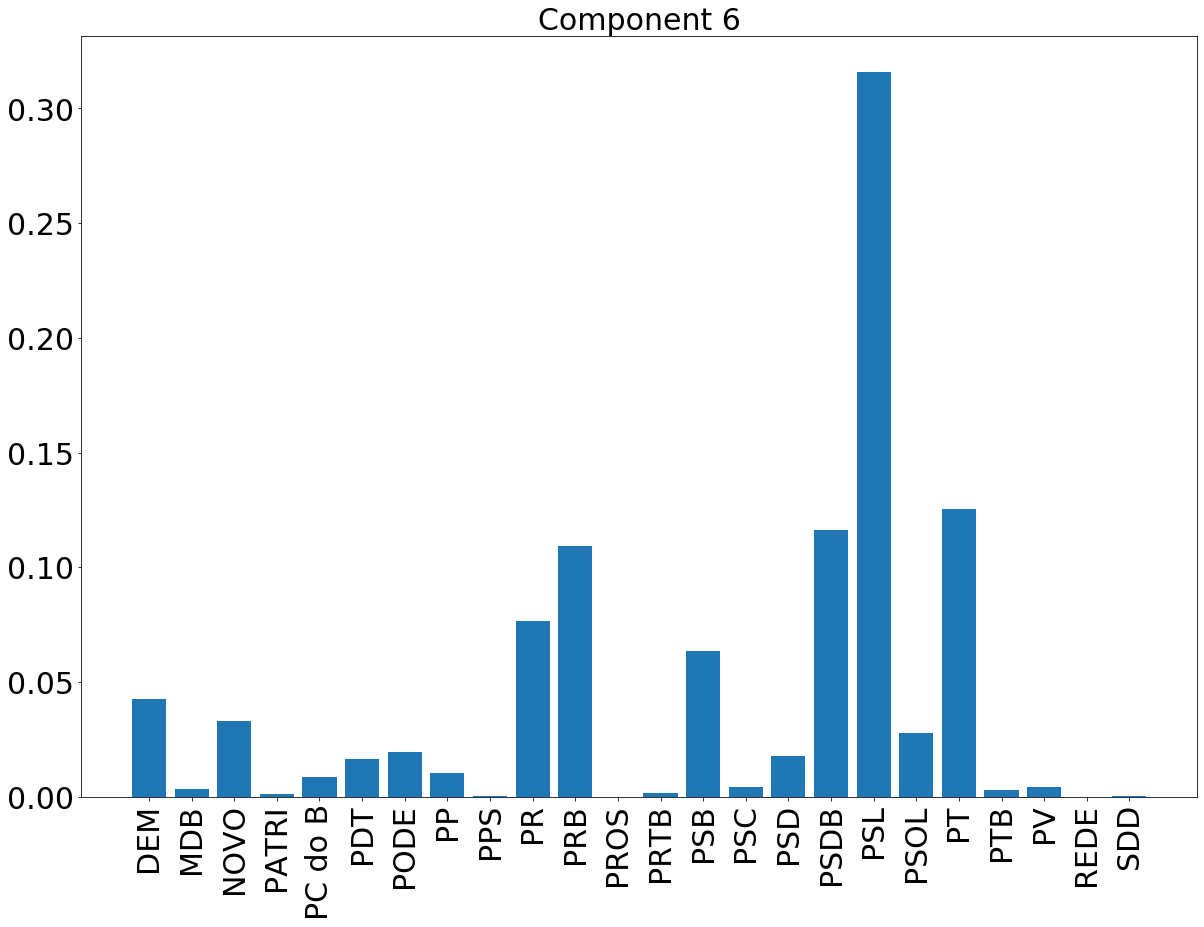

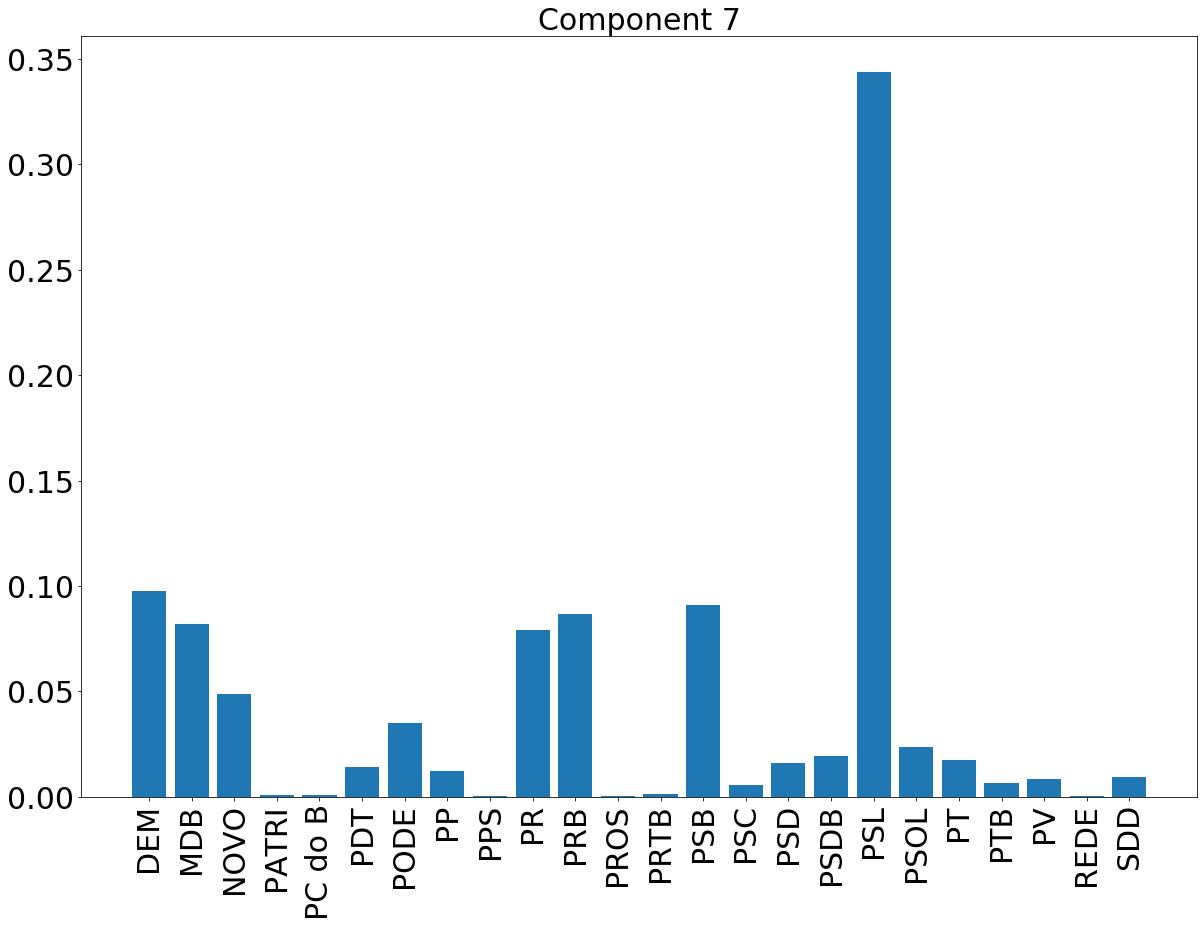

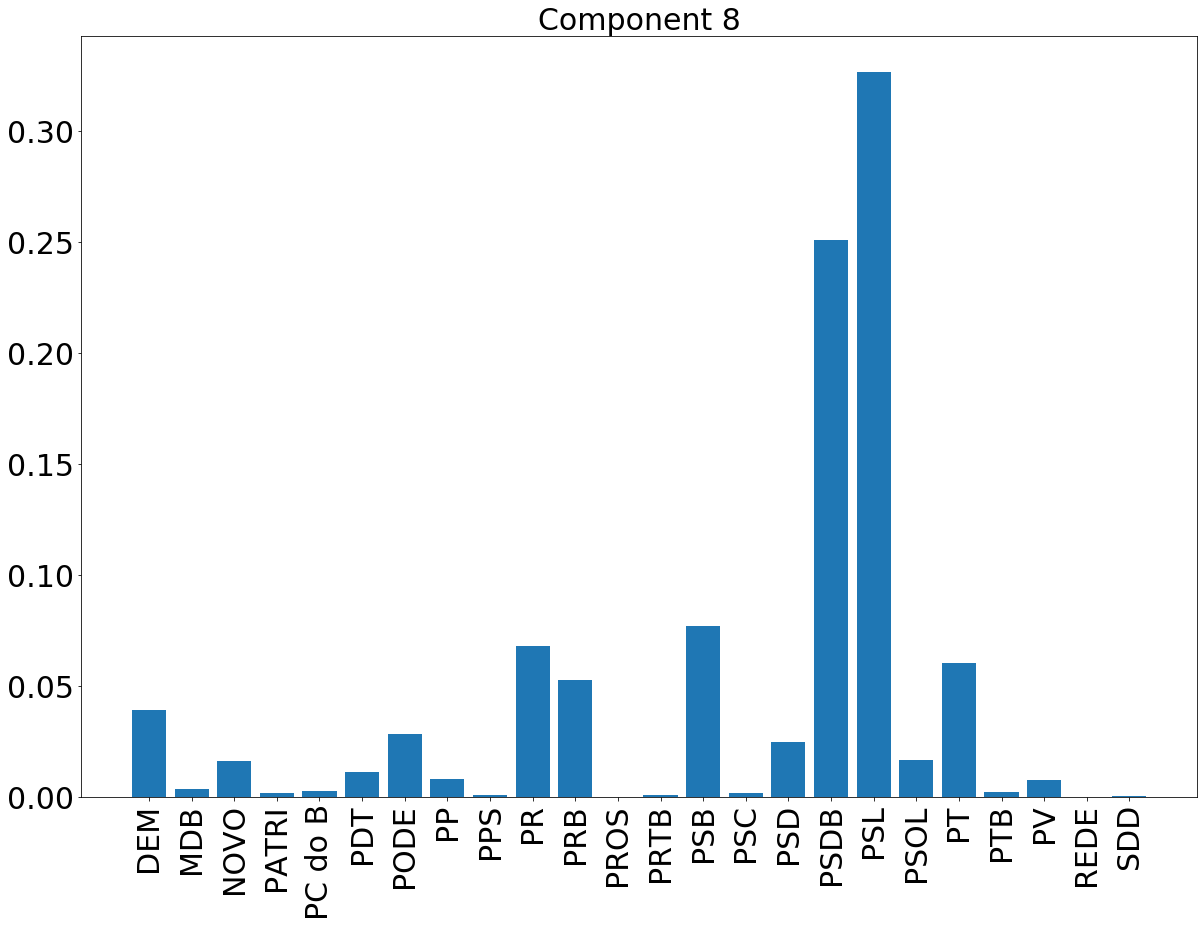

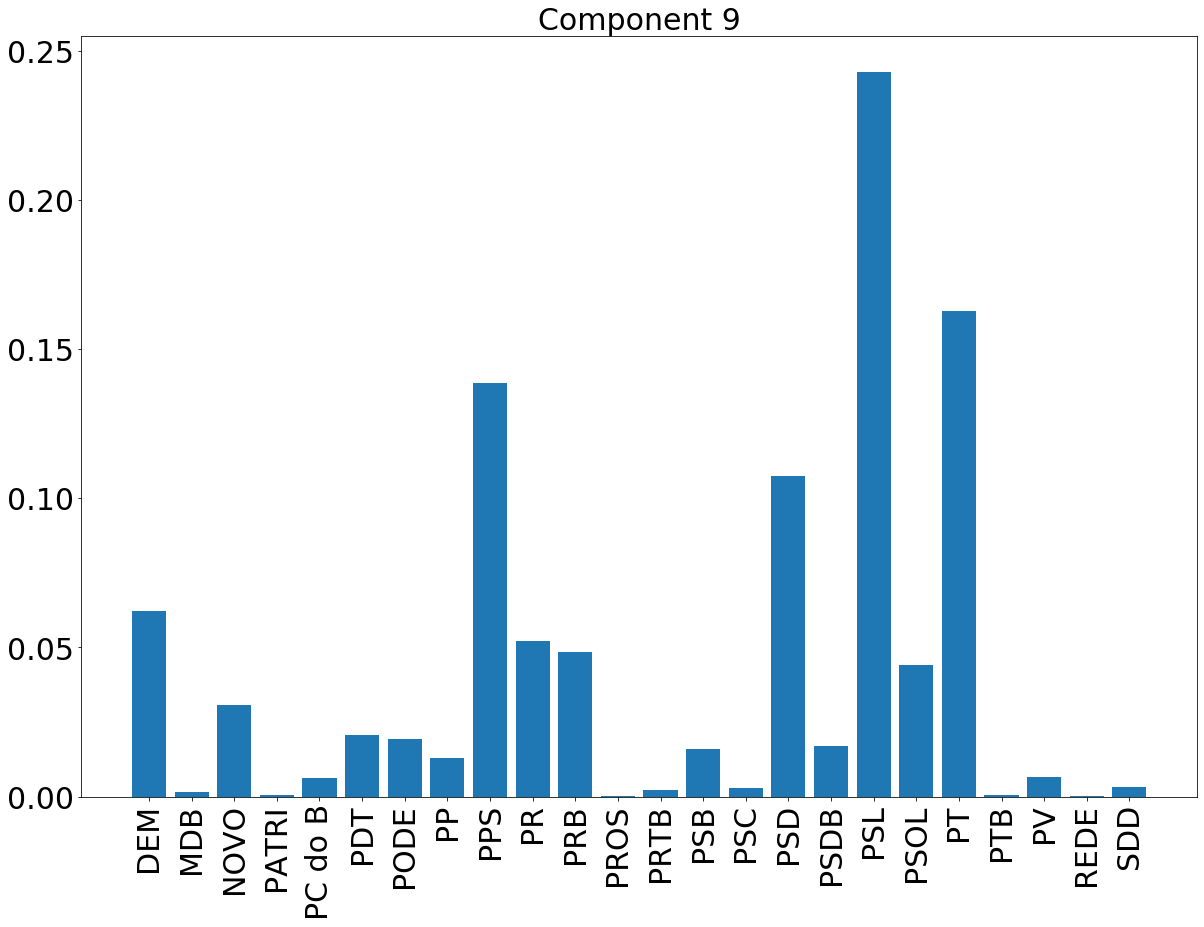

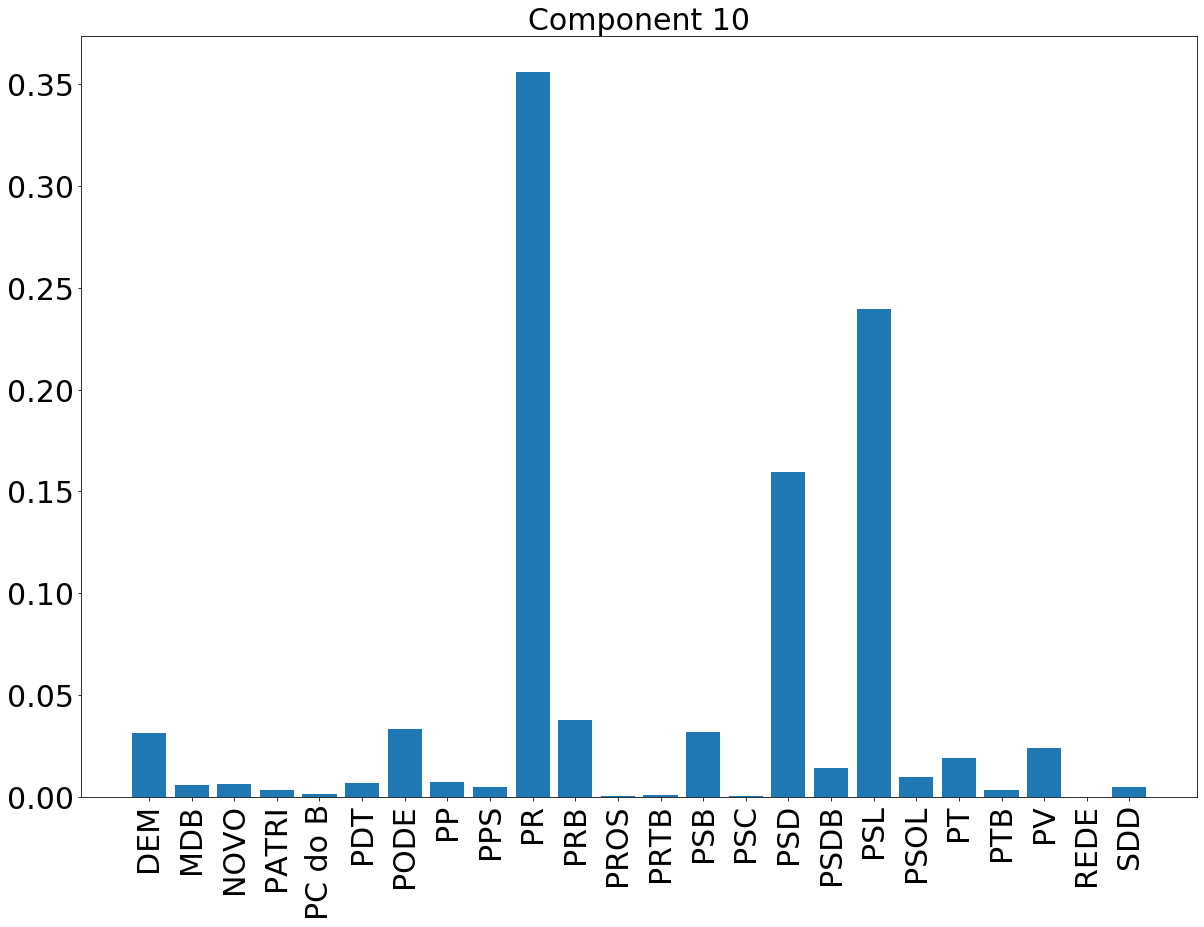

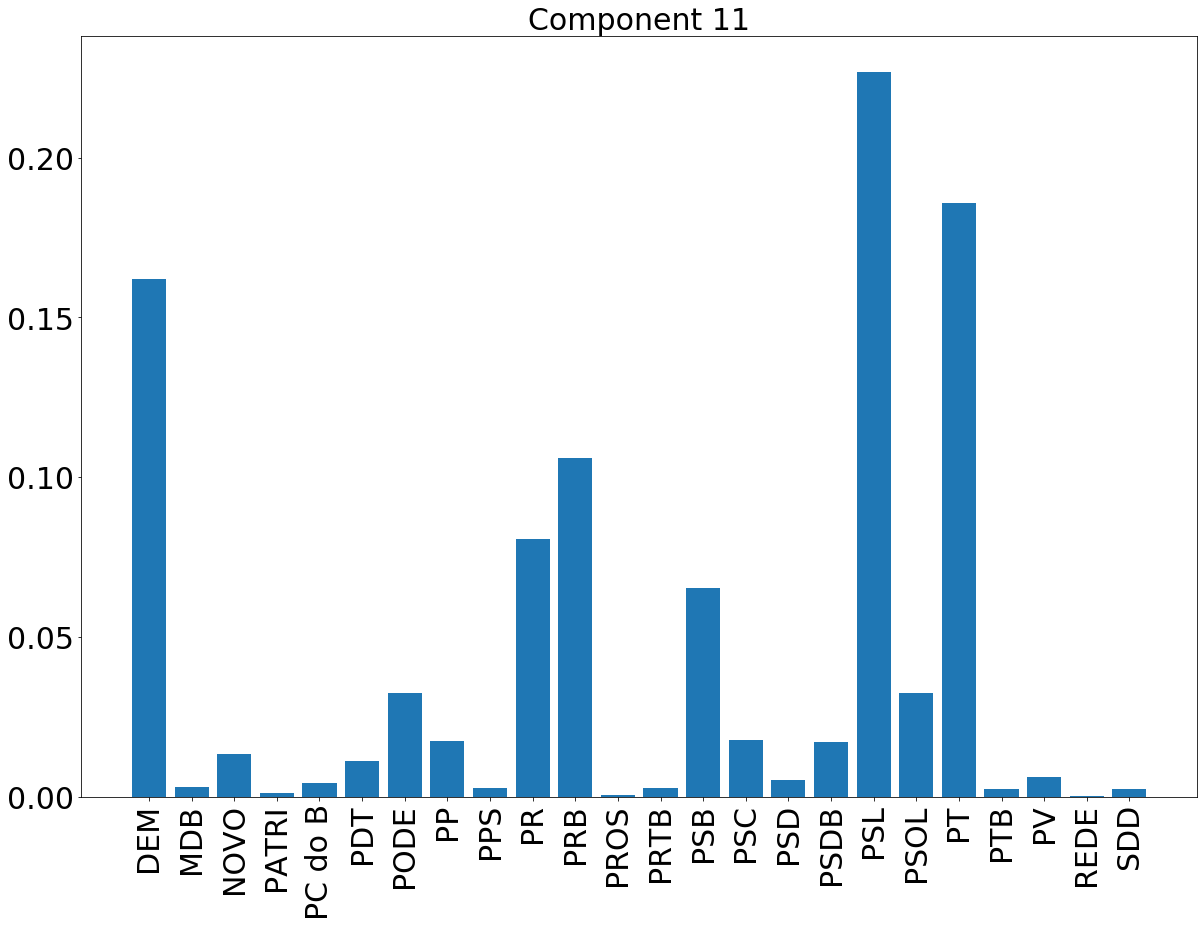

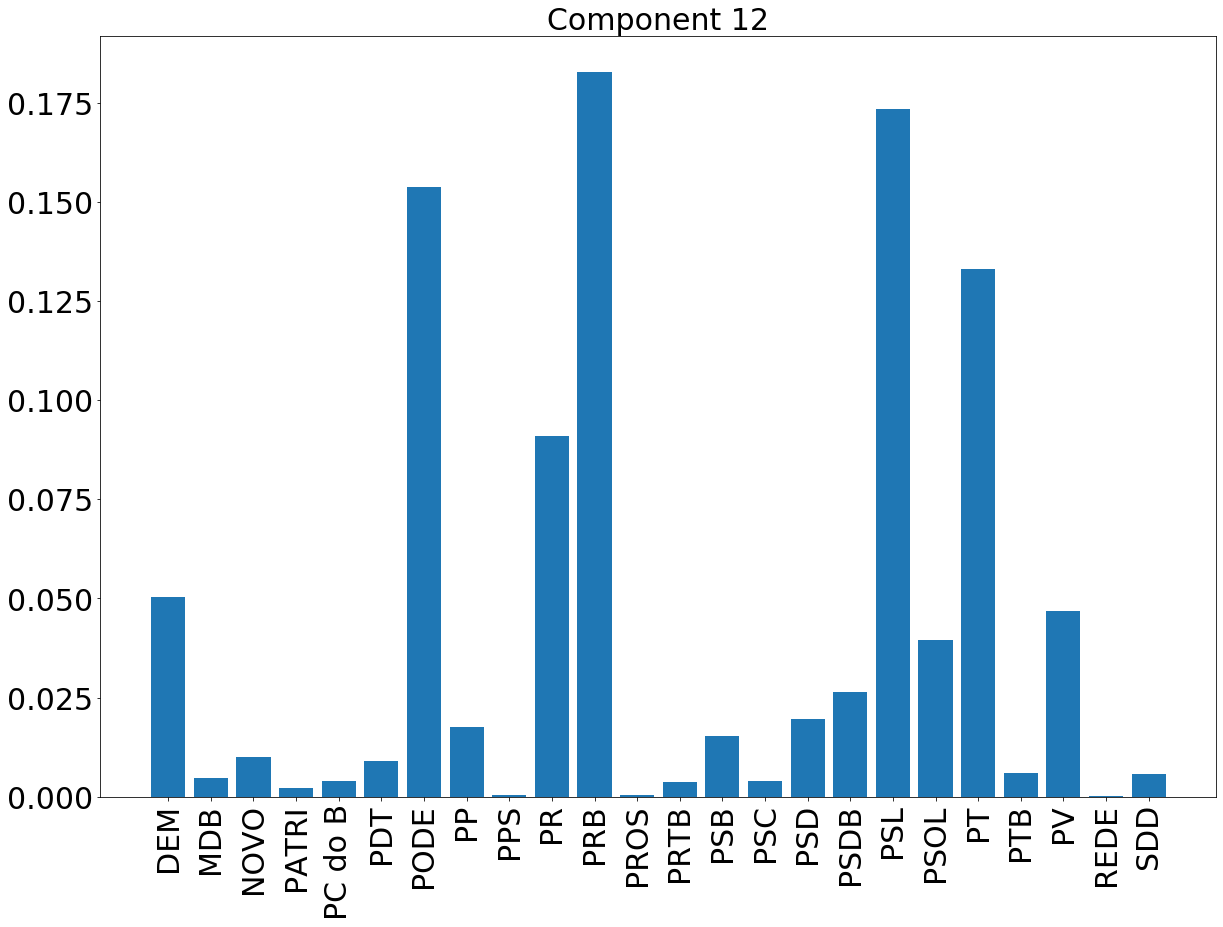

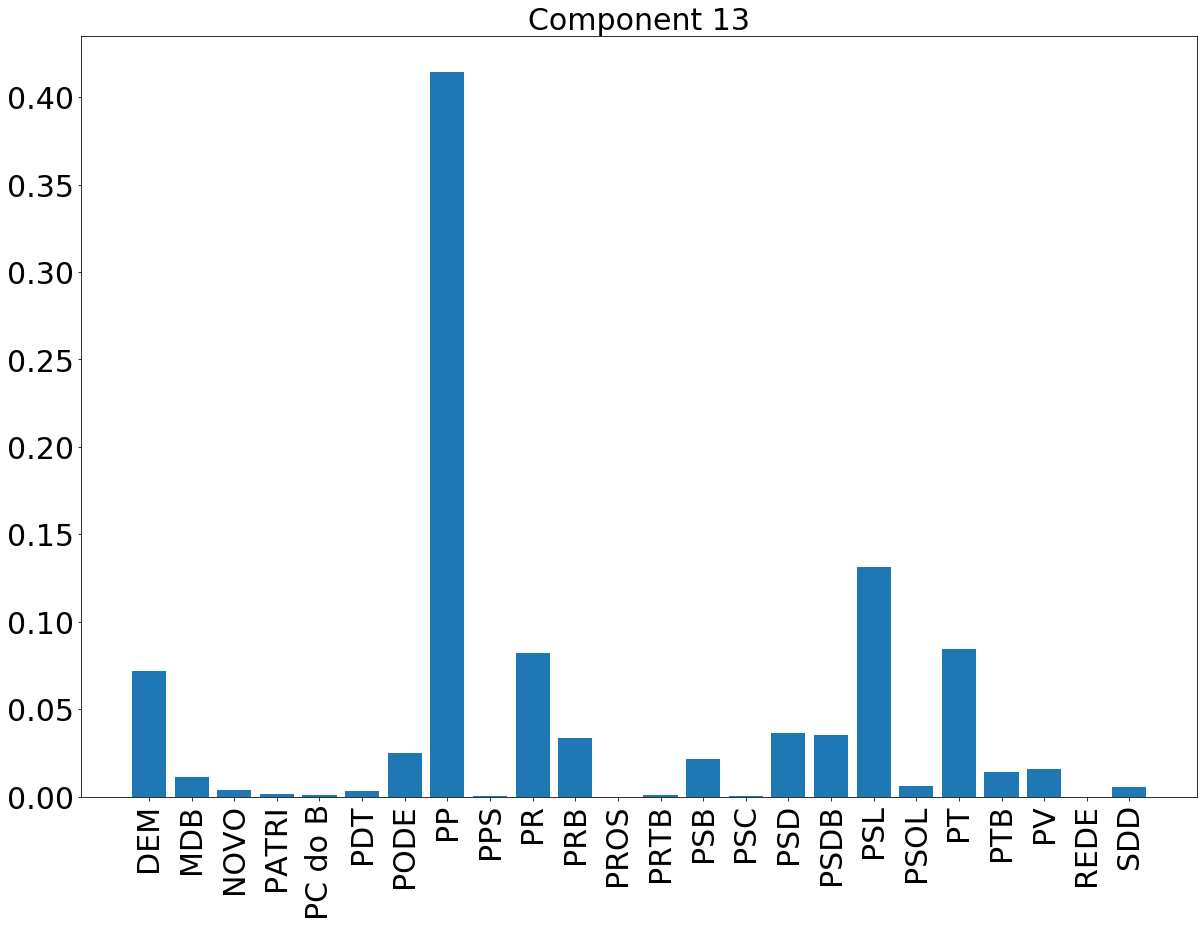

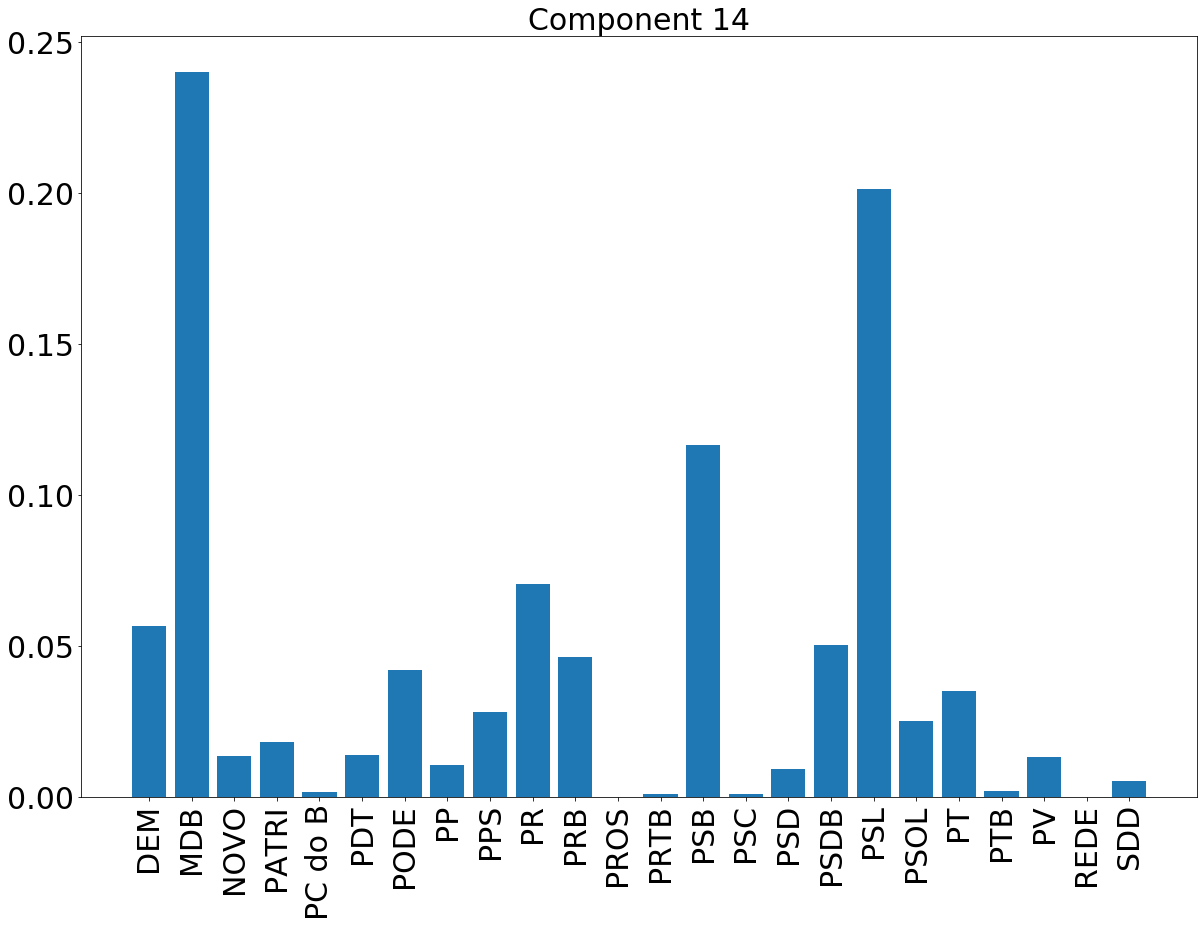

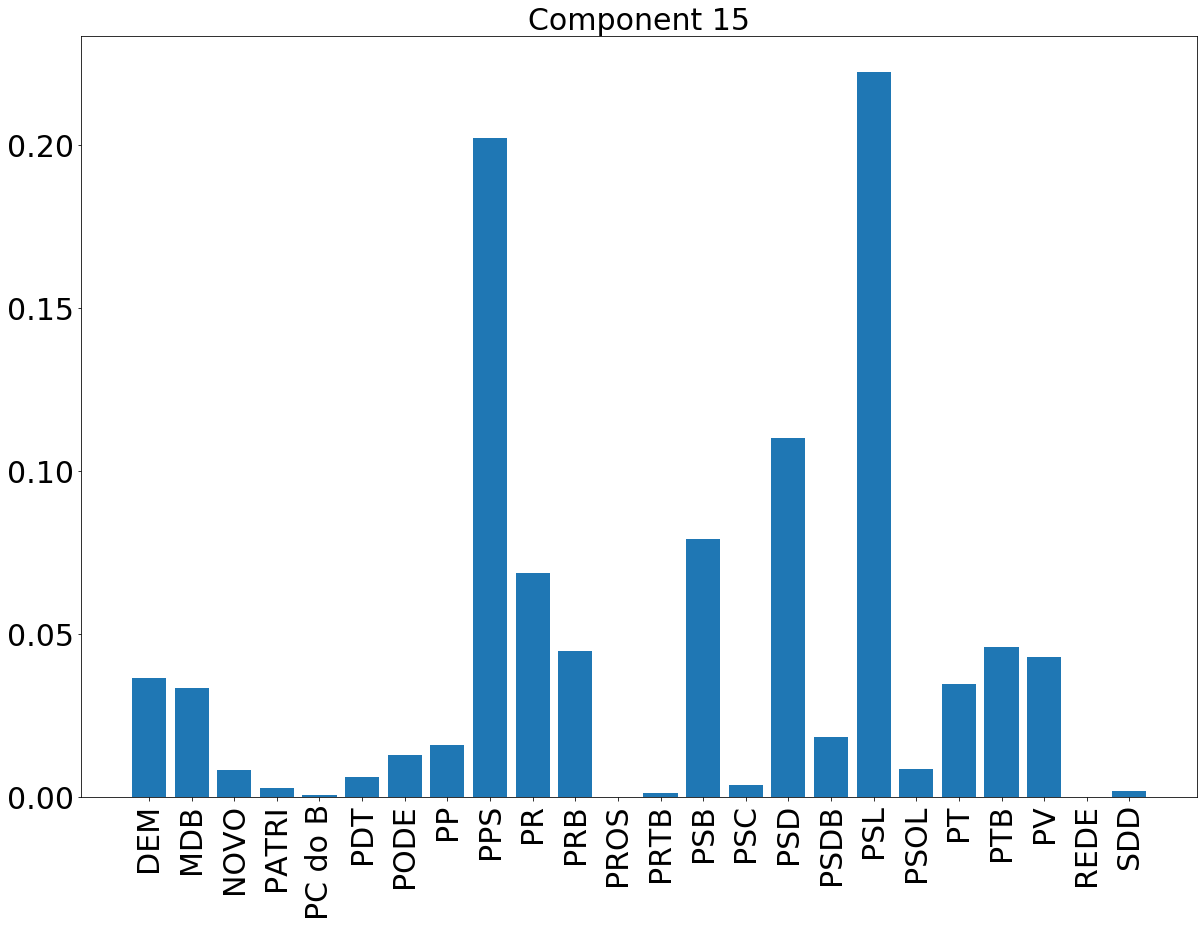

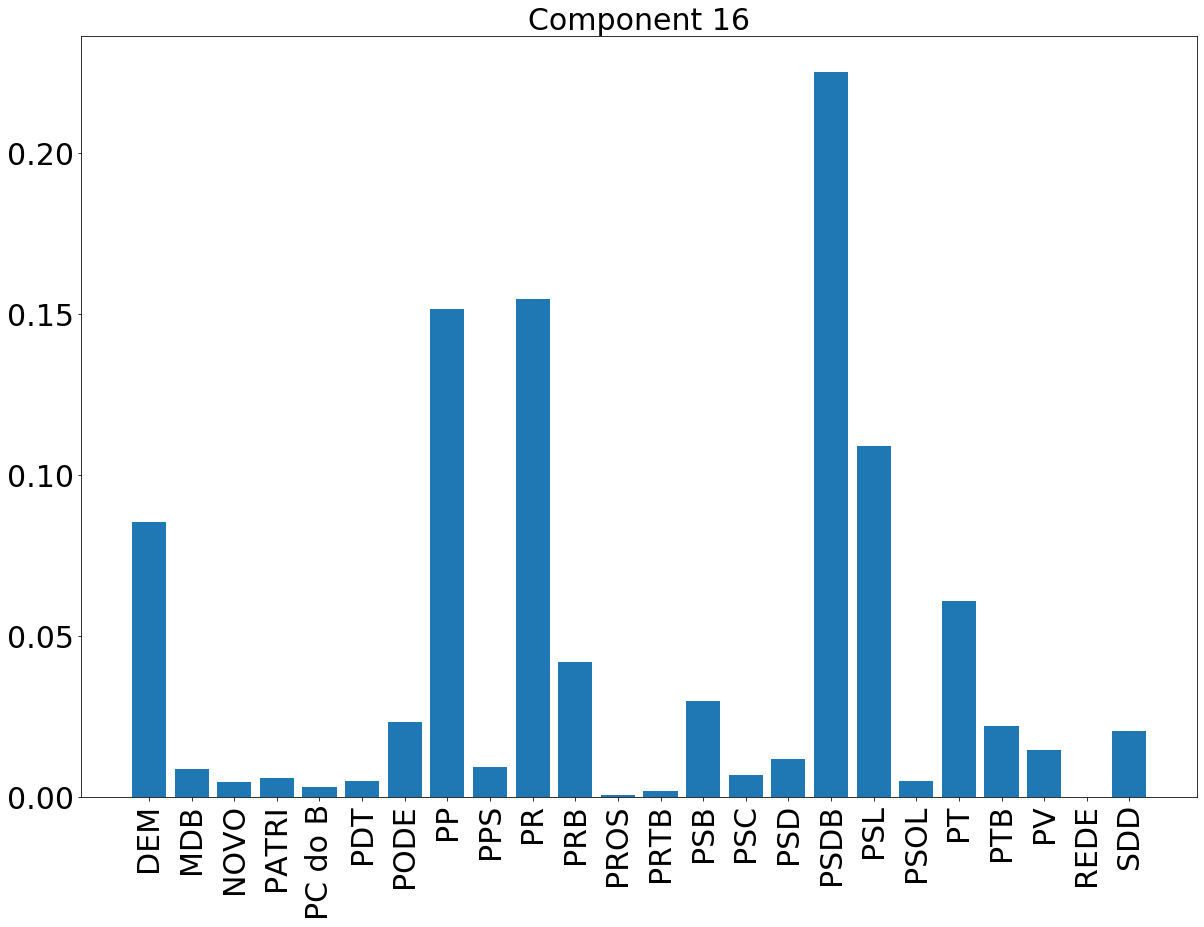

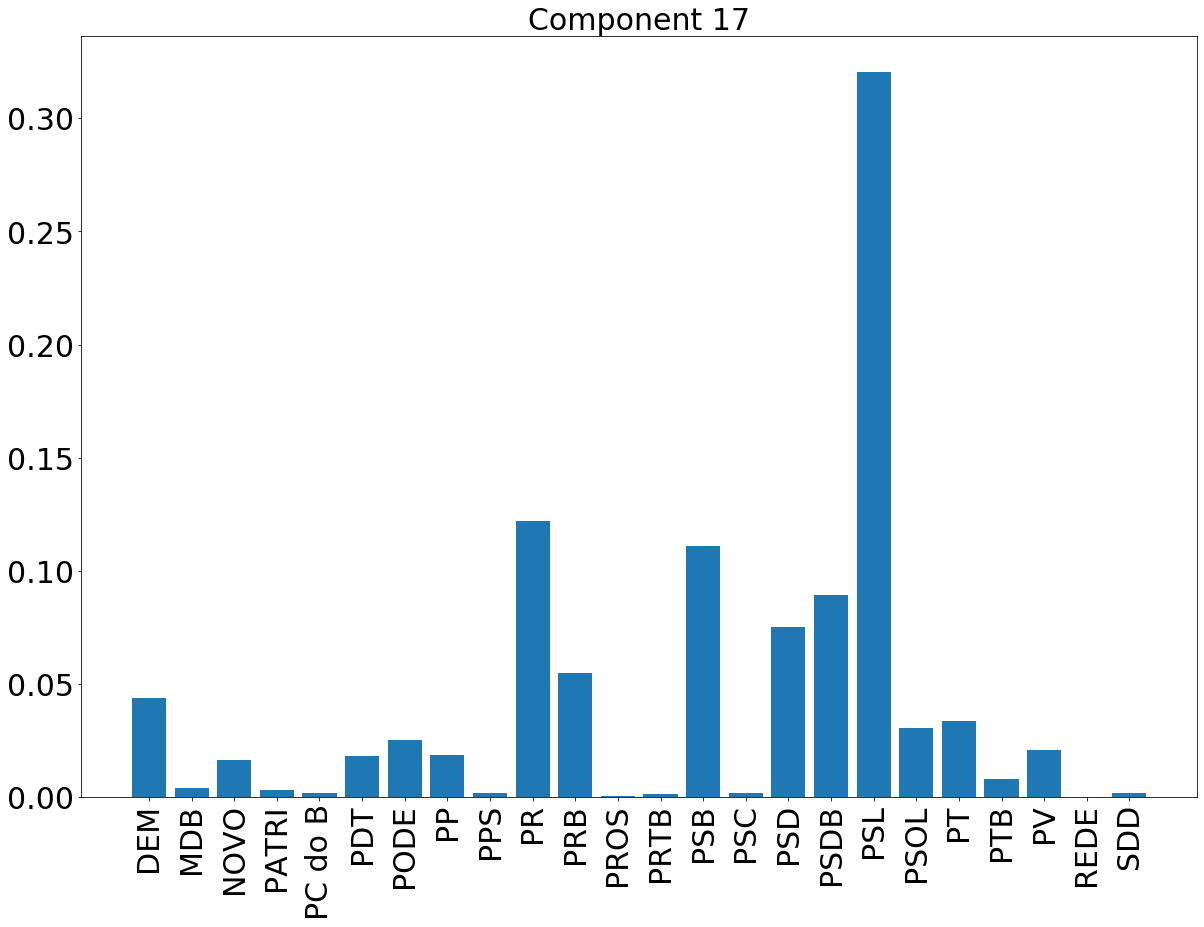

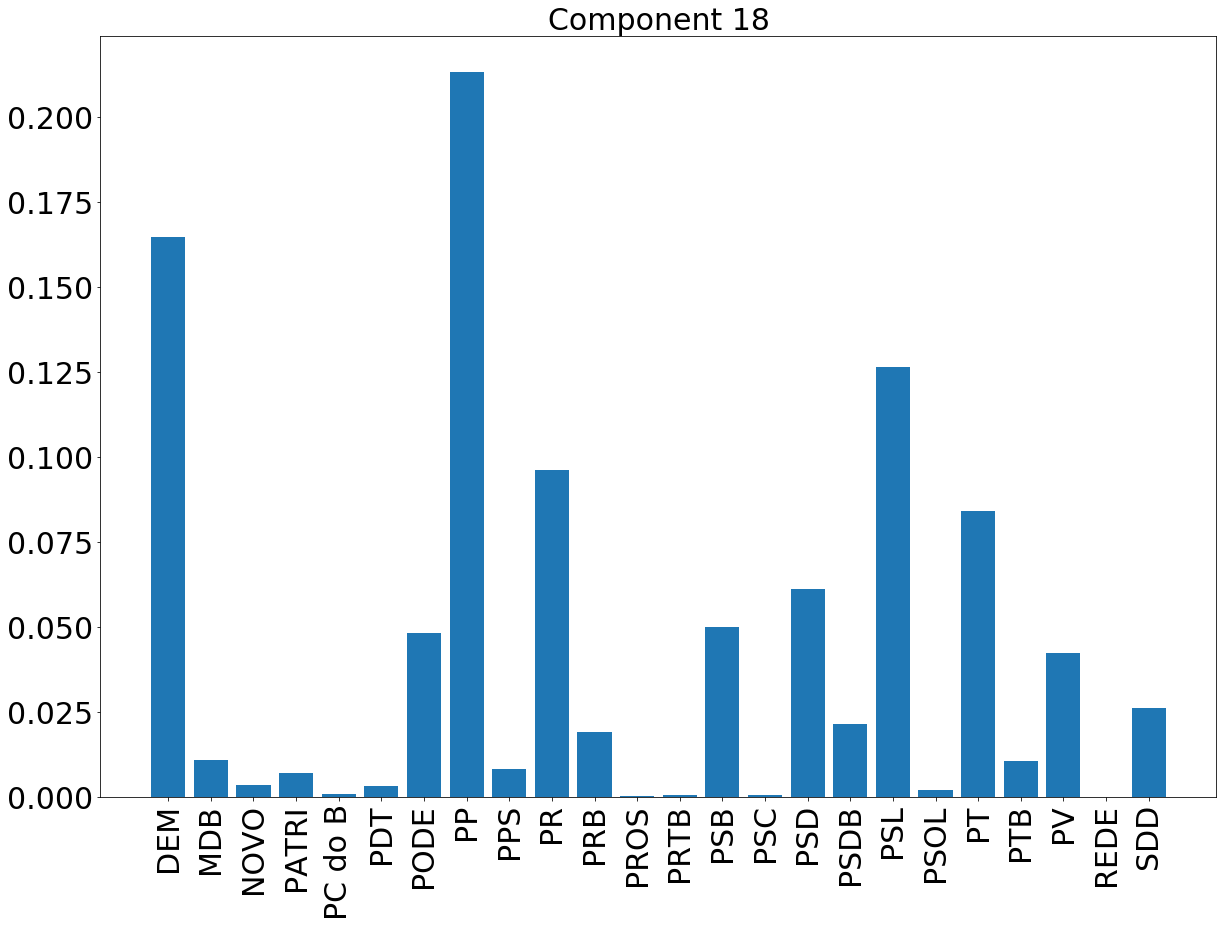

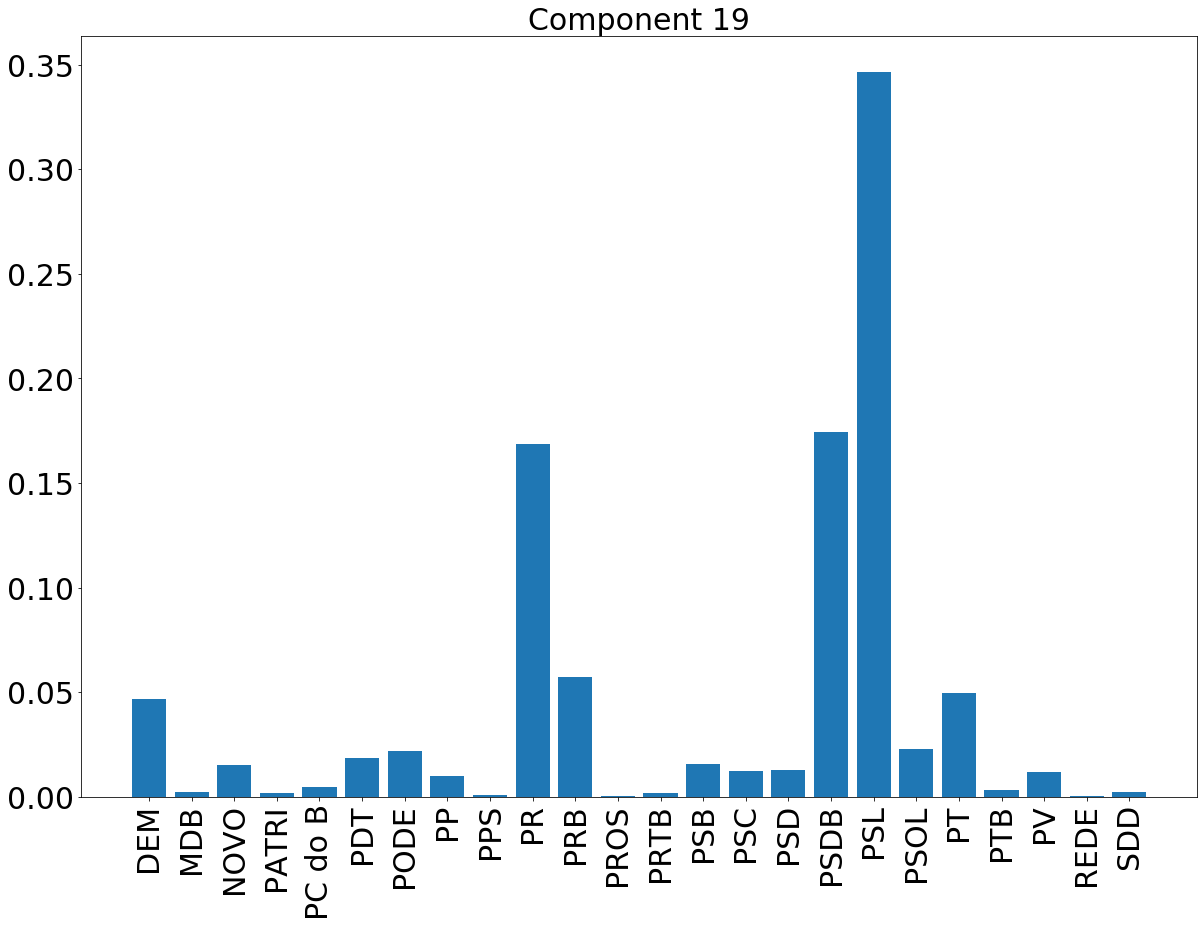

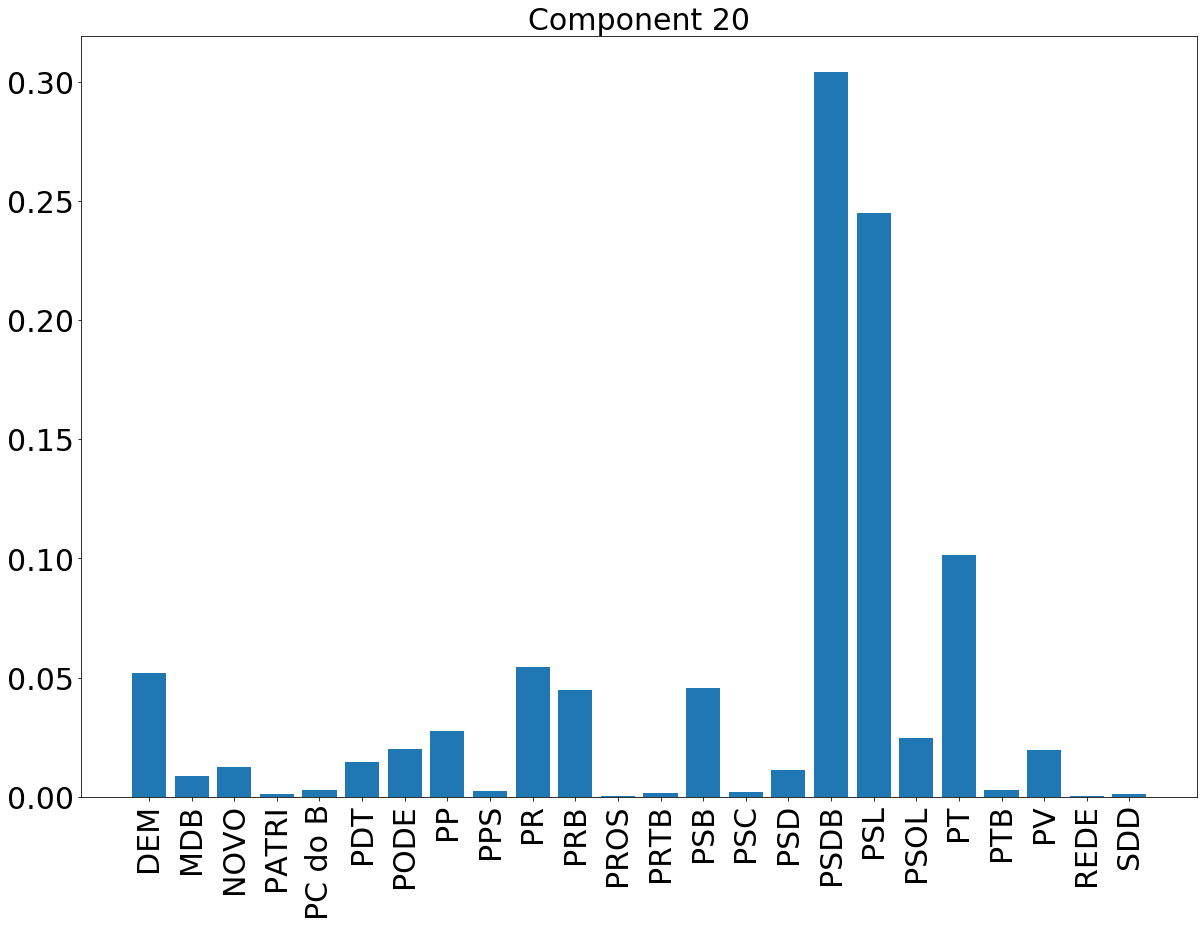

In [67]:
# plota o gráfico de partido por componente
import matplotlib.pyplot as plt

for i in range(len(partidos_candidatos.T.index)):
    plt.figure(figsize=(20,14))
    current_component = partidos_candidatos.T.iloc[i,:].copy()
    plt.bar(x=partidos_candidatos.T.columns,height=current_component)
    plt.xticks(fontsize=30,rotation=90)
    plt.yticks(fontsize=30)
    plt.title(partidos_candidatos.T.index[i],fontdict={'size':30})
    plt.savefig(f"Distribuição Partidos do Componente {i+1}.png")
    plt.show()